How to run a star cluster simulation
====================

More realistic star clusters have stars that move and evolve in time.
The movement of stars is caused by their mutual gravity, which we will take care of by means of integrating the equations of motion under Newtonian forces. This is realized using, what we call, and N-body code. Stellar evolution influences the gravitational dynamics by altering the mass of the N-body particles. It is taken care of by means of a parametrized stellar evolution code.

For reference you can read chapter 4 of Portegies Zwart & McMillan 2018 (2018araa.book.....P). 

With this tutorial you will learn
- how to generate inital conditions (mass-function, Plummer model)
- to initialize gravitational N-body codes and parametrized stellar evolution codes
- channels and intra-code data transfer
- plotting results

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import units
from amuse.units.constants import Stefan_hyphen_Boltzmann_constant as kB
from amuse.units.constants import G

Let's start by generating the initial conditions.
This includes a mass function (for which we adopt the Salpeter power-law), and a Plummer sphere for the spatial distribution. After assigning the masses to the stars in the Plummer sphere, we scale the entire system to virial equilibrium.

In [2]:
n_stars = 100
alpha_IMF = -2.35

from amuse.lab import new_powerlaw_mass_distribution
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)

r_cluster = 1.0 | units.parsec
from amuse.units import nbody_system
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
from amuse.ic.plummer import new_plummer_model
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)

stars_o = stars.copy()
stars_c = stars.copy()
stars_s = stars.copy()
stars_fin = stars.copy()

Let's check if this is what we expected.

In [3]:
def plot_snapshot(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars.temperature.value_in(units.K),
                stars.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()

def plot_snapshot_o(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars_o.temperature.value_in(units.K),
                stars_o.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()
    
def plot_snapshot_c(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars_c.temperature.value_in(units.K),
                stars_c.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()
    
def plot_snapshot_o(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars_o.temperature.value_in(units.K),
                stars_o.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()
    
def plot_snapshot_s(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars_s.temperature.value_in(units.K),
                stars_s.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()
    
def plot_snapshot_fin(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars_fin.temperature.value_in(units.K),
                stars_fin.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()

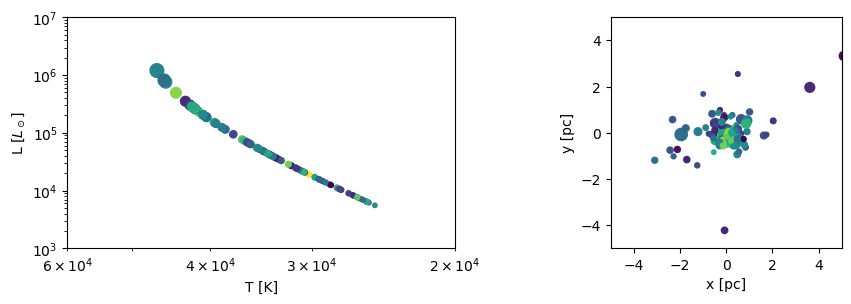

In [4]:
from amuse.community.ph4.interface import ph4
from amuse.community.seba.interface import SeBa
from amuse.ext.LagrangianRadii import LagrangianRadii

stellar = SeBa()
stellar.particles.add_particles(stars_o)

gravity = ph4(converter)
gravity.particles.add_particles(stars_o)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars_o)
ch_s2l = stellar.particles.new_channel_to(stars_o)
ch_s2l.copy()

plot_snapshot_o(stars_o)

Now let's run the code. Why is the coupling timescale between gravity and stellar evolution chosen the way it is?

Evolved to t= 0.031496523817 Myr 0.0315224286819 Myr mass= 2027.53327908 MSun rvir= 0.958953931433 parsec
Evolved to t= 0.0628698436224 Myr 0.0633681643247 Myr mass= 2027.33410491 MSun rvir= 0.984722007246 parsec
Evolved to t= 0.094147666372 Myr 0.0944056325654 Myr mass= 2027.13400452 MSun rvir= 0.971711070736 parsec
Evolved to t= 0.125329662172 Myr 0.125443100806 Myr mass= 2026.93297464 MSun rvir= 0.959746065731 parsec
Evolved to t= 0.156415546187 Myr 0.156480569047 Myr mass= 2026.73101178 MSun rvir= 0.944174423869 parsec
Evolved to t= 0.187405053326 Myr 0.187518037287 Myr mass= 2026.52811248 MSun rvir= 0.928640036088 parsec
Evolved to t= 0.218297938024 Myr 0.218555505528 Myr mass= 2026.32427326 MSun rvir= 0.917250911792 parsec
Evolved to t= 0.249093973981 Myr 0.249592973769 Myr mass= 2026.11949063 MSun rvir= 0.906680165998 parsec
Evolved to t= 0.279792953905 Myr 0.279822174607 Myr mass= 2025.91376113 MSun rvir= 0.879455896244 parsec
Evolved to t= 0.310394689245 Myr 0.310455509147 Myr

Evolved to t= 2.40516198633 Myr 2.40540378865 Myr mass= 2006.62373886 MSun rvir= 1.03902725115 parsec
Evolved to t= 2.42855270329 Myr 2.42868188983 Myr mass= 2006.34726941 MSun rvir= 1.02166061688 parsec
Evolved to t= 2.45186468631 Myr 2.45195999101 Myr mass= 2006.070454 MSun rvir= 1.0269228406 parsec
Evolved to t= 2.4750982308 Myr 2.47523809219 Myr mass= 2005.79333052 MSun rvir= 1.0493936017 parsec
Evolved to t= 2.49825362327 Myr 2.49851619337 Myr mass= 2005.51593878 MSun rvir= 1.04407372117 parsec
Evolved to t= 2.52133114059 Myr 2.52179429456 Myr mass= 2005.23832052 MSun rvir= 1.05165622711 parsec
Evolved to t= 2.54433104949 Myr 2.54442578181 Myr mass= 2004.96051956 MSun rvir= 1.05105852126 parsec
Evolved to t= 2.56725360585 Myr 2.56835049692 Myr mass= 2004.68258187 MSun rvir= 1.05298236713 parsec
Evolved to t= 2.59009905404 Myr 2.59033537025 Myr mass= 2004.40455565 MSun rvir= 1.04684790623 parsec
Evolved to t= 2.61286762624 Myr 2.61296685751 Myr mass= 2004.12649147 MSun rvir= 1.0452

Evolved to t= 3.63229551579 Myr 3.632677012 Myr mass= 1988.76882615 MSun rvir= 0.887547266385 parsec
Evolved to t= 3.63433638026 Myr 3.63461685377 Myr mass= 1988.72178387 MSun rvir= 0.887282549914 parsec
Evolved to t= 3.6362634697 Myr 3.63655669553 Myr mass= 1988.67731011 MSun rvir= 0.886864415729 parsec
Evolved to t= 3.63808258633 Myr 3.63817323034 Myr mass= 1988.63525043 MSun rvir= 0.886426495299 parsec
Evolved to t= 3.63979938598 Myr 3.6401130721 Myr mass= 1988.59545941 MSun rvir= 0.885788993804 parsec
Evolved to t= 3.64141934688 Myr 3.64172960691 Myr mass= 1988.55780081 MSun rvir= 0.885156055031 parsec
Evolved to t= 3.64294774731 Myr 3.64302283475 Myr mass= 1988.52215494 MSun rvir= 0.884590955525 parsec
Evolved to t= 3.64438965055 Myr 3.64463936955 Myr mass= 1988.48841287 MSun rvir= 0.883861676187 parsec
Evolved to t= 3.64574989566 Myr 3.6459325974 Myr mass= 1988.45647172 MSun rvir= 0.883346389232 parsec
Evolved to t= 3.64703309332 Myr 3.64722582524 Myr mass= 1988.42623433 MSun rvi

Evolved to t= 3.66855179393 Myr 3.66856408466 Myr mass= 1987.89686021 MSun rvir= 0.868997640996 parsec
Evolved to t= 3.66857134779 Myr 3.66858429134 Myr mass= 1987.89635377 MSun rvir= 0.86895719533 parsec
Evolved to t= 3.66858986251 Myr 3.66860449803 Myr mass= 1987.89587419 MSun rvir= 0.868916647321 parsec
Evolved to t= 3.66860739339 Myr 3.66862470471 Myr mass= 1987.89542005 MSun rvir= 0.868875996863 parsec
Evolved to t= 3.6686239928 Myr 3.66862470471 Myr mass= 1987.89499 MSun rvir= 0.86887610727 parsec
Evolved to t= 3.66863971033 Myr 3.6686449114 Myr mass= 1987.89458275 MSun rvir= 0.868835348368 parsec
Evolved to t= 3.6686545929 Myr 3.66866511808 Myr mass= 1987.8941971 MSun rvir= 0.868794487041 parsec
Evolved to t= 3.66866868492 Myr 3.66868532477 Myr mass= 1987.89383191 MSun rvir= 0.868753523096 parsec
Evolved to t= 3.66868202845 Myr 3.66868532477 Myr mass= 1987.89348609 MSun rvir= 0.86875361186 parsec
Evolved to t= 3.6686946633 Myr 3.66870553145 Myr mass= 1987.89315861 MSun rvir= 0.8

Evolved to t= 3.66891538629 Myr 3.66892780499 Myr mass= 1987.88743378 MSun rvir= 0.86825469253 parsec
Evolved to t= 3.66891563569 Myr 3.66892780499 Myr mass= 1987.88742731 MSun rvir= 0.86825469419 parsec
Evolved to t= 3.66891587185 Myr 3.66892780499 Myr mass= 1987.88742118 MSun rvir= 0.868254695762 parsec
Evolved to t= 3.66891609549 Myr 3.66892780499 Myr mass= 1987.88741538 MSun rvir= 0.868254697251 parsec
Evolved to t= 3.66891630727 Myr 3.66892780499 Myr mass= 1987.88740988 MSun rvir= 0.86825469866 parsec
Evolved to t= 3.66891650781 Myr 3.66892780499 Myr mass= 1987.88740468 MSun rvir= 0.868254699995 parsec
Evolved to t= 3.66891669772 Myr 3.66892780499 Myr mass= 1987.88739975 MSun rvir= 0.868254701259 parsec
Evolved to t= 3.66891687756 Myr 3.66892780499 Myr mass= 1987.88739508 MSun rvir= 0.868254702456 parsec
Evolved to t= 3.66891704785 Myr 3.66892780499 Myr mass= 1987.88739066 MSun rvir= 0.86825470359 parsec
Evolved to t= 3.66891720912 Myr 3.66892780499 Myr mass= 1987.88738647 MSun rv

Evolved to t= 3.66892003993 Myr 3.66892780499 Myr mass= 1987.887313 MSun rvir= 0.868254723507 parsec
Evolved to t= 3.66892004249 Myr 3.66892780499 Myr mass= 1987.88731294 MSun rvir= 0.868254723524 parsec
Evolved to t= 3.66892004492 Myr 3.66892780499 Myr mass= 1987.88731287 MSun rvir= 0.86825472354 parsec
Evolved to t= 3.66892004722 Myr 3.66892780499 Myr mass= 1987.88731281 MSun rvir= 0.868254723555 parsec
Evolved to t= 3.6689200494 Myr 3.66892780499 Myr mass= 1987.88731276 MSun rvir= 0.86825472357 parsec
Evolved to t= 3.66892005146 Myr 3.66892780499 Myr mass= 1987.8873127 MSun rvir= 0.868254723583 parsec
Evolved to t= 3.66892005341 Myr 3.66892780499 Myr mass= 1987.88731265 MSun rvir= 0.868254723596 parsec
Evolved to t= 3.66892005526 Myr 3.66892780499 Myr mass= 1987.88731261 MSun rvir= 0.868254723609 parsec
Evolved to t= 3.66892005701 Myr 3.66892780499 Myr mass= 1987.88731256 MSun rvir= 0.86825472362 parsec
Evolved to t= 3.66892005866 Myr 3.66892780499 Myr mass= 1987.88731252 MSun rvir=

Evolved to t= 3.67046199487 Myr 3.67046351305 Myr mass= 1987.6840269 MSun rvir= 0.864733253241 parsec
Evolved to t= 3.67049509432 Myr 3.67050392642 Myr mass= 1987.67872249 MSun rvir= 0.86462918619 parsec
Evolved to t= 3.67052820613 Myr 3.67054433979 Myr mass= 1987.67341607 MSun rvir= 0.864524415513 parsec
Evolved to t= 3.6705613303 Myr 3.67056454648 Myr mass= 1987.66810763 MSun rvir= 0.864472380143 parsec
Evolved to t= 3.67059446684 Myr 3.67062516653 Myr mass= 1987.66279717 MSun rvir= 0.864312717031 parsec
Evolved to t= 3.67062761577 Myr 3.67064537322 Myr mass= 1987.65748469 MSun rvir= 0.86425995105 parsec
Evolved to t= 3.67066077709 Myr 3.6706655799 Myr mass= 1987.65217019 MSun rvir= 0.864206998564 parsec
Evolved to t= 3.67069395081 Myr 3.67070599327 Myr mass= 1987.64685366 MSun rvir= 0.864099294706 parsec
Evolved to t= 3.67072713694 Myr 3.67074640664 Myr mass= 1987.64153512 MSun rvir= 0.863990826602 parsec
Evolved to t= 3.67076033548 Myr 3.67076661333 Myr mass= 1987.63621454 MSun rvi

Evolved to t= 3.67266259977 Myr 3.67266604172 Myr mass= 1987.33128702 MSun rvir= 0.857598626876 parsec
Evolved to t= 3.67266411176 Myr 3.67266604172 Myr mass= 1987.3310446 MSun rvir= 0.857598680178 parsec
Evolved to t= 3.6726654873 Myr 3.67266604172 Myr mass= 1987.33082406 MSun rvir= 0.857598728669 parsec
Evolved to t= 3.67266673871 Myr 3.67267614506 Myr mass= 1987.33062343 MSun rvir= 0.857555359785 parsec
Evolved to t= 3.67266787717 Myr 3.67267614506 Myr mass= 1987.3304409 MSun rvir= 0.857555399905 parsec
Evolved to t= 3.67266891288 Myr 3.67267614506 Myr mass= 1987.33027484 MSun rvir= 0.857555436404 parsec
Evolved to t= 3.67266985512 Myr 3.67267614506 Myr mass= 1987.33012378 MSun rvir= 0.857555469609 parsec
Evolved to t= 3.67267071231 Myr 3.67267614506 Myr mass= 1987.32998634 MSun rvir= 0.857555499818 parsec
Evolved to t= 3.67267149214 Myr 3.67267614506 Myr mass= 1987.32986132 MSun rvir= 0.857555527299 parsec
Evolved to t= 3.67267220158 Myr 3.67267614506 Myr mass= 1987.32974757 MSun r

Evolved to t= 3.67267934987 Myr 3.67268624841 Myr mass= 1987.32860149 MSun rvir= 0.857512246569 parsec
Evolved to t= 3.67267935087 Myr 3.67268624841 Myr mass= 1987.32860133 MSun rvir= 0.857512246605 parsec
Evolved to t= 3.67267935187 Myr 3.67268624841 Myr mass= 1987.32860132 MSun rvir= 0.857512246608 parsec
Evolved to t= 3.69009627218 Myr 3.69022565103 Myr mass= 1984.52289349 MSun rvir= 0.850056343458 parsec
Evolved to t= 3.70620204434 Myr 3.70622934559 Myr mass= 1981.91214586 MSun rvir= 0.864886314876 parsec
Evolved to t= 3.72113405575 Myr 3.72126311927 Myr mass= 1979.47120423 MSun rvir= 0.876439107524 parsec
Evolved to t= 3.73499076807 Myr 3.73516531859 Myr mass= 1977.18056532 MSun rvir= 0.884376844868 parsec
Evolved to t= 3.74786239492 Myr 3.74793594354 Myr mass= 1975.022295 MSun rvir= 0.876830653083 parsec
Evolved to t= 3.75983159138 Myr 3.76005995457 Myr mass= 1973.01600146 MSun rvir= 0.891402723549 parsec
Evolved to t= 3.7709705153 Myr 3.77105239124 Myr mass= 1971.14928635 MSun r

Evolved to t= 3.91560086577 Myr 3.91561101611 Myr mass= 1947.76479651 MSun rvir= 0.929982721303 parsec
Evolved to t= 3.91564829439 Myr 3.91565142948 Myr mass= 1947.75883329 MSun rvir= 0.92948442029 parsec
Evolved to t= 3.91569246862 Myr 3.91573225622 Myr mass= 1947.75328034 MSun rvir= 0.928430731711 parsec
Evolved to t= 3.91573361255 Myr 3.91574235956 Myr mass= 1947.74810925 MSun rvir= 0.928294004943 parsec
Evolved to t= 3.91577193473 Myr 3.91577266959 Myr mass= 1947.74329362 MSun rvir= 0.927874439524 parsec
Evolved to t= 3.91580762928 Myr 3.91581308296 Myr mass= 1947.73880889 MSun rvir= 0.927295430217 parsec
Evolved to t= 3.91584087688 Myr 3.91585349633 Myr mass= 1947.73463222 MSun rvir= 0.926692981427 parsec
Evolved to t= 3.91587184571 Myr 3.91587370301 Myr mass= 1947.73074234 MSun rvir= 0.926382746757 parsec
Evolved to t= 3.91590069235 Myr 3.91591411638 Myr mass= 1947.72711948 MSun rvir= 0.925742174848 parsec
Evolved to t= 3.91592756257 Myr 3.91593432307 Myr mass= 1947.72374524 MSun

Evolved to t= 3.9162916645 Myr 3.91629299173 Myr mass= 1947.67806084 MSun rvir= 0.918075177309 parsec
Evolved to t= 3.91629177946 Myr 3.91629299173 Myr mass= 1947.67804642 MSun rvir= 0.918075179287 parsec
Evolved to t= 3.91629188656 Myr 3.91629299173 Myr mass= 1947.678033 MSun rvir= 0.91807518113 parsec
Evolved to t= 3.91629198634 Myr 3.91629299173 Myr mass= 1947.67802049 MSun rvir= 0.918075182847 parsec
Evolved to t= 3.9162920793 Myr 3.91629299173 Myr mass= 1947.67800883 MSun rvir= 0.918075184446 parsec
Evolved to t= 3.9162921659 Myr 3.91629299173 Myr mass= 1947.67799797 MSun rvir= 0.918075185937 parsec
Evolved to t= 3.91629224659 Myr 3.91629299173 Myr mass= 1947.67798786 MSun rvir= 0.918075187325 parsec
Evolved to t= 3.91629232176 Myr 3.91629299173 Myr mass= 1947.67797843 MSun rvir= 0.918075188618 parsec
Evolved to t= 3.91629239179 Myr 3.91629299173 Myr mass= 1947.67796965 MSun rvir= 0.918075189823 parsec
Evolved to t= 3.91629245703 Myr 3.91629299173 Myr mass= 1947.67796147 MSun rvir

Evolved to t= 3.91629334764 Myr 3.9162980434 Myr mass= 1947.67784982 MSun rvir= 0.917946345537 parsec
Evolved to t= 3.91633860143 Myr 3.91637887014 Myr mass= 1947.6721764 MSun rvir= 0.915756000219 parsec
Evolved to t= 3.91638387397 Myr 3.91638392181 Myr mass= 1947.66650249 MSun rvir= 0.91561117099 parsec
Evolved to t= 3.91642916526 Myr 3.91645969688 Myr mass= 1947.66082807 MSun rvir= 0.913288817916 parsec
Evolved to t= 3.91647447533 Myr 3.91647990357 Myr mass= 1947.65515316 MSun rvir= 0.912622255977 parsec
Evolved to t= 3.91651980419 Myr 3.91652031694 Myr mass= 1947.64947774 MSun rvir= 0.911220536312 parsec
Evolved to t= 3.91656515186 Myr 3.91658093699 Myr mass= 1947.64380182 MSun rvir= 0.90892846795 parsec
Evolved to t= 3.91661051836 Myr 3.91662135036 Myr mass= 1947.6381254 MSun rvir= 0.907256893301 parsec
Evolved to t= 3.91665590369 Myr 3.91666176373 Myr mass= 1947.63245117 MSun rvir= 0.905453347512 parsec
Evolved to t= 3.91670130787 Myr 3.9167021771 Myr mass= 1947.62678691 MSun rvir

Evolved to t= 3.92016027364 Myr 3.92017772693 Myr mass= 1946.76362118 MSun rvir= 0.933697968682 parsec
Evolved to t= 3.92020085022 Myr 3.9202181403 Myr mass= 1946.75297533 MSun rvir= 0.933924135735 parsec
Evolved to t= 3.92023694635 Myr 3.92023834699 Myr mass= 1946.74350584 MSun rvir= 0.934037000758 parsec
Evolved to t= 3.92026905395 Myr 3.92027876036 Myr mass= 1946.73508338 MSun rvir= 0.934252468127 parsec
Evolved to t= 3.92029761152 Myr 3.92029896704 Myr mass= 1946.72759268 MSun rvir= 0.934359663873 parsec
Evolved to t= 3.92032300983 Myr 3.92033938041 Myr mass= 1946.72093108 MSun rvir= 0.934565277629 parsec
Evolved to t= 3.92034559699 Myr 3.92034948375 Myr mass= 1946.71500713 MSun rvir= 0.934618027363 parsec
Evolved to t= 3.92036568305 Myr 3.92037979378 Myr mass= 1946.70973941 MSun rvir= 0.934767623626 parsec
Evolved to t= 3.92038354408 Myr 3.92038989712 Myr mass= 1946.70505543 MSun rvir= 0.934818339455 parsec
Evolved to t= 3.92039942587 Myr 3.92040000047 Myr mass= 1946.70089065 MSun

Evolved to t= 3.92052663709 Myr 3.92053134392 Myr mass= 1946.66753686 MSun rvir= 0.935479886071 parsec
Evolved to t= 3.92052663892 Myr 3.92053134392 Myr mass= 1946.66753638 MSun rvir= 0.935479886319 parsec
Evolved to t= 3.92052664055 Myr 3.92053134392 Myr mass= 1946.66753595 MSun rvir= 0.935479886539 parsec
Evolved to t= 3.920526642 Myr 3.92053134392 Myr mass= 1946.66753558 MSun rvir= 0.935479886735 parsec
Evolved to t= 3.92052664329 Myr 3.92053134392 Myr mass= 1946.66753524 MSun rvir= 0.935479886909 parsec
Evolved to t= 3.92052664443 Myr 3.92053134392 Myr mass= 1946.66753494 MSun rvir= 0.935479887064 parsec
Evolved to t= 3.92052664545 Myr 3.92053134392 Myr mass= 1946.66753467 MSun rvir= 0.935479887202 parsec
Evolved to t= 3.92052664645 Myr 3.92053134392 Myr mass= 1946.66753441 MSun rvir= 0.935479887337 parsec
Evolved to t= 3.92052664745 Myr 3.92053134392 Myr mass= 1946.66753415 MSun rvir= 0.935479887473 parsec
Evolved to t= 3.92052664845 Myr 3.92053134392 Myr mass= 1946.66753389 MSun 

Evolved to t= 4.01863108513 Myr 4.01870552325 Myr mass= 1922.66464131 MSun rvir= 1.02018712156 parsec
Evolved to t= 4.02050765876 Myr 4.02064536501 Myr mass= 1922.2339815 MSun rvir= 1.02519494789 parsec
Evolved to t= 4.02239901732 Myr 4.02258520678 Myr mass= 1921.80087588 MSun rvir= 1.02865758531 parsec
Evolved to t= 4.02430533597 Myr 4.02452504854 Myr mass= 1921.3652722 MSun rvir= 1.03112273039 parsec
Evolved to t= 4.02622679255 Myr 4.02646489031 Myr mass= 1920.92712453 MSun rvir= 1.03297965869 parsec
Evolved to t= 4.02816356764 Myr 4.02840473207 Myr mass= 1920.48638552 MSun rvir= 1.0344428726 parsec
Evolved to t= 4.03011584463 Myr 4.03034457384 Myr mass= 1920.04300632 MSun rvir= 1.03563255907 parsec
Evolved to t= 4.03204801166 Myr 4.0322844156 Myr mass= 1919.60505771 MSun rvir= 1.03661555036 parsec
Evolved to t= 4.03381924324 Myr 4.03422425737 Myr mass= 1919.20437042 MSun rvir= 1.03741875052 parsec
Evolved to t= 4.03544332412 Myr 4.03551748521 Myr mass= 1918.83760975 MSun rvir= 1.037

Evolved to t= 4.05392676133 Myr 4.05394598198 Myr mass= 1914.70087594 MSun rvir= 1.04172784008 parsec
Evolved to t= 4.05393099104 Myr 4.05394598198 Myr mass= 1914.69993602 MSun rvir= 1.04172845032 parsec
Evolved to t= 4.0539348949 Myr 4.05394598198 Myr mass= 1914.69906852 MSun rvir= 1.04172901355 parsec
Evolved to t= 4.05393849802 Myr 4.05394598198 Myr mass= 1914.69826785 MSun rvir= 1.04172953339 parsec
Evolved to t= 4.05394182356 Myr 4.05394598198 Myr mass= 1914.69752885 MSun rvir= 1.04173001319 parsec
Evolved to t= 4.05394489293 Myr 4.05394598198 Myr mass= 1914.69684679 MSun rvir= 1.04173045602 parsec
Evolved to t= 4.05394772585 Myr 4.05410763546 Myr mass= 1914.69621727 MSun rvir= 1.04172971323 parsec
Evolved to t= 4.05395034055 Myr 4.05410763546 Myr mass= 1914.69563625 MSun rvir= 1.04173009072 parsec
Evolved to t= 4.05395275383 Myr 4.05410763546 Myr mass= 1914.69509998 MSun rvir= 1.04173043914 parsec
Evolved to t= 4.05395498123 Myr 4.05410763546 Myr mass= 1914.69460502 MSun rvir= 1.

Evolved to t= 4.05398162528 Myr 4.05410763546 Myr mass= 1914.68868438 MSun rvir= 1.04173460748 parsec
Evolved to t= 4.05398162893 Myr 4.05410763546 Myr mass= 1914.68868357 MSun rvir= 1.04173460801 parsec
Evolved to t= 4.05398163231 Myr 4.05410763546 Myr mass= 1914.68868282 MSun rvir= 1.0417346085 parsec
Evolved to t= 4.05398163543 Myr 4.05410763546 Myr mass= 1914.68868212 MSun rvir= 1.04173460895 parsec
Evolved to t= 4.0539816383 Myr 4.05410763546 Myr mass= 1914.68868148 MSun rvir= 1.04173460936 parsec
Evolved to t= 4.05398164096 Myr 4.05410763546 Myr mass= 1914.68868089 MSun rvir= 1.04173460975 parsec
Evolved to t= 4.05398164341 Myr 4.05410763546 Myr mass= 1914.68868035 MSun rvir= 1.0417346101 parsec
Evolved to t= 4.05398164567 Myr 4.05410763546 Myr mass= 1914.68867985 MSun rvir= 1.04173461043 parsec
Evolved to t= 4.05398164776 Myr 4.05410763546 Myr mass= 1914.68867938 MSun rvir= 1.04173461073 parsec
Evolved to t= 4.05398164968 Myr 4.05410763546 Myr mass= 1914.68867896 MSun rvir= 1.04

Evolved to t= 4.05688204355 Myr 4.05701739811 Myr mass= 1913.76993527 MSun rvir= 1.04208432794 parsec
Evolved to t= 4.0569364042 Myr 4.05701739811 Myr mass= 1913.75022499 MSun rvir= 1.0420915298 parsec
Evolved to t= 4.05699078887 Myr 4.05701739811 Myr mass= 1913.73050659 MSun rvir= 1.04209873515 parsec
Evolved to t= 4.0570451976 Myr 4.05717905159 Myr mass= 1913.71078006 MSun rvir= 1.04210197446 parsec
Evolved to t= 4.05709963039 Myr 4.05717905159 Myr mass= 1913.69104539 MSun rvir= 1.04210919172 parsec
Evolved to t= 4.05715408728 Myr 4.05717905159 Myr mass= 1913.67130257 MSun rvir= 1.04211641248 parsec
Evolved to t= 4.05720856829 Myr 4.05734070507 Myr mass= 1913.6515516 MSun rvir= 1.0421194966 parsec
Evolved to t= 4.05726307342 Myr 4.05734070507 Myr mass= 1913.63179247 MSun rvir= 1.04212672933 parsec
Evolved to t= 4.05731760272 Myr 4.05734070507 Myr mass= 1913.61202517 MSun rvir= 1.04213396557 parsec
Evolved to t= 4.05737215619 Myr 4.05750235855 Myr mass= 1913.5922497 MSun rvir= 1.04213

Evolved to t= 4.05847830579 Myr 4.05863393291 Myr mass= 1913.19140228 MSun rvir= 1.04224897408 parsec
Evolved to t= 4.05847831713 Myr 4.05863393291 Myr mass= 1913.19139817 MSun rvir= 1.04224897559 parsec
Evolved to t= 4.05847832709 Myr 4.05863393291 Myr mass= 1913.19139457 MSun rvir= 1.04224897692 parsec
Evolved to t= 4.05847833583 Myr 4.05863393291 Myr mass= 1913.1913914 MSun rvir= 1.04224897809 parsec
Evolved to t= 4.0584783435 Myr 4.05863393291 Myr mass= 1913.19138862 MSun rvir= 1.04224897912 parsec
Evolved to t= 4.05847835022 Myr 4.05863393291 Myr mass= 1913.19138619 MSun rvir= 1.04224898001 parsec
Evolved to t= 4.05847835613 Myr 4.05863393291 Myr mass= 1913.19138405 MSun rvir= 1.0422489808 parsec
Evolved to t= 4.05847836131 Myr 4.05863393291 Myr mass= 1913.19138217 MSun rvir= 1.0422489815 parsec
Evolved to t= 4.05847836586 Myr 4.05863393291 Myr mass= 1913.19138052 MSun rvir= 1.0422489821 parsec
Evolved to t= 4.05847836985 Myr 4.05863393291 Myr mass= 1913.19137908 MSun rvir= 1.0422

Evolved to t= 4.08046428566 Myr 4.08053797951 Myr mass= 1905.26576744 MSun rvir= 1.04488660689 parsec
Evolved to t= 4.08053082183 Myr 4.08053797951 Myr mass= 1905.24189228 MSun rvir= 1.04489688202 parsec
Evolved to t= 4.0805939551 Myr 4.08061880625 Myr mass= 1905.21923869 MSun rvir= 1.0449039761 parsec
Evolved to t= 4.08065385816 Myr 4.08069963299 Myr mass= 1905.19774462 MSun rvir= 1.04491051231 parsec
Evolved to t= 4.08071069509 Myr 4.08078045973 Myr mass= 1905.17735113 MSun rvir= 1.04491651604 parsec
Evolved to t= 4.08076462174 Myr 4.08078045973 Myr mass= 1905.15800223 MSun rvir= 1.04492485898 parsec
Evolved to t= 4.08081578616 Myr 4.08086128647 Myr mass= 1905.13964474 MSun rvir= 1.04492993162 parsec
Evolved to t= 4.08086432895 Myr 4.08094211321 Myr mass= 1905.12222818 MSun rvir= 1.0449345403 parsec
Evolved to t= 4.08091038366 Myr 4.08094211321 Myr mass= 1905.10570457 MSun rvir= 1.0449416739 parsec
Evolved to t= 4.0809540771 Myr 4.08102293995 Myr mass= 1905.09002838 MSun rvir= 1.0449

Evolved to t= 4.08174644154 Myr 4.08175038061 Myr mass= 1904.80578624 MSun rvir= 1.04503944757 parsec
Evolved to t= 4.08174714897 Myr 4.08175038061 Myr mass= 1904.80553249 MSun rvir= 1.04503955781 parsec
Evolved to t= 4.08174781994 Myr 4.08175038061 Myr mass= 1904.80529183 MSun rvir= 1.04503966238 parsec
Evolved to t= 4.08174845632 Myr 4.08175038061 Myr mass= 1904.80506358 MSun rvir= 1.04503976155 parsec
Evolved to t= 4.08174905989 Myr 4.08175038061 Myr mass= 1904.80484709 MSun rvir= 1.04503985561 parsec
Evolved to t= 4.08174963234 Myr 4.08175038061 Myr mass= 1904.80464176 MSun rvir= 1.04503994481 parsec
Evolved to t= 4.08175017528 Myr 4.08175038061 Myr mass= 1904.80444702 MSun rvir= 1.04504002943 parsec
Evolved to t= 4.08175069023 Myr 4.08183120735 Myr mass= 1904.80426232 MSun rvir= 1.0450366124 parsec
Evolved to t= 4.08175117864 Myr 4.08183120735 Myr mass= 1904.80408714 MSun rvir= 1.04503668855 parsec
Evolved to t= 4.08175164187 Myr 4.08183120735 Myr mass= 1904.80392099 MSun rvir= 1.

Evolved to t= 4.08176001906 Myr 4.08183120735 Myr mass= 1904.80091627 MSun rvir= 1.04503806694 parsec
Evolved to t= 4.08176002652 Myr 4.08183120735 Myr mass= 1904.80091359 MSun rvir= 1.0450380681 parsec
Evolved to t= 4.0817600336 Myr 4.08183120735 Myr mass= 1904.80091106 MSun rvir= 1.0450380692 parsec
Evolved to t= 4.08176004031 Myr 4.08183120735 Myr mass= 1904.80090865 MSun rvir= 1.04503807025 parsec
Evolved to t= 4.08176004667 Myr 4.08183120735 Myr mass= 1904.80090637 MSun rvir= 1.04503807124 parsec
Evolved to t= 4.08176005271 Myr 4.08183120735 Myr mass= 1904.8009042 MSun rvir= 1.04503807218 parsec
Evolved to t= 4.08176005843 Myr 4.08183120735 Myr mass= 1904.80090215 MSun rvir= 1.04503807308 parsec
Evolved to t= 4.08176006386 Myr 4.08183120735 Myr mass= 1904.8009002 MSun rvir= 1.04503807392 parsec
Evolved to t= 4.08176006901 Myr 4.08183120735 Myr mass= 1904.80089835 MSun rvir= 1.04503807473 parsec
Evolved to t= 4.0817600739 Myr 4.08183120735 Myr mass= 1904.8008966 MSun rvir= 1.045038

Evolved to t= 4.0999127312 Myr 4.09993639716 Myr mass= 1896.71199673 MSun rvir= 1.04915346783 parsec
Evolved to t= 4.10011181037 Myr 4.10017887738 Myr mass= 1896.64765501 MSun rvir= 1.04922783729 parsec
Evolved to t= 4.10029472575 Myr 4.10034053086 Myr mass= 1896.58853185 MSun rvir= 1.04928608374 parsec
Evolved to t= 4.10046280514 Myr 4.10050218434 Myr mass= 1896.53419939 MSun rvir= 1.04934181761 parsec
Evolved to t= 4.10061726495 Myr 4.10066383782 Myr mass= 1896.48426554 MSun rvir= 1.04939523706 parsec
Evolved to t= 4.10075921991 Myr 4.1008254913 Myr mass= 1896.43837088 MSun rvir= 1.04944652505 parsec
Evolved to t= 4.10088969183 Myr 4.10090631804 Myr mass= 1896.39618587 MSun rvir= 1.04948244396 parsec
Evolved to t= 4.10100961763 Myr 4.10114879826 Myr mass= 1896.35740827 MSun rvir= 1.04954337107 parsec
Evolved to t= 4.10111985655 Myr 4.10114879826 Myr mass= 1896.32176082 MSun rvir= 1.04956242392 parsec
Evolved to t= 4.10122119681 Myr 4.101229625 Myr mass= 1896.28898915 MSun rvir= 1.049

Evolved to t= 4.10237784074 Myr 4.1024420261 Myr mass= 1895.91483019 MSun rvir= 1.04999583286 parsec
Evolved to t= 4.10237803246 Myr 4.1024420261 Myr mass= 1895.91476815 MSun rvir= 1.04999586626 parsec
Evolved to t= 4.10237820882 Myr 4.1024420261 Myr mass= 1895.91471109 MSun rvir= 1.04999589699 parsec
Evolved to t= 4.10237837105 Myr 4.1024420261 Myr mass= 1895.91465859 MSun rvir= 1.04999592526 parsec
Evolved to t= 4.10237852028 Myr 4.1024420261 Myr mass= 1895.9146103 MSun rvir= 1.04999595126 parsec
Evolved to t= 4.10237865757 Myr 4.1024420261 Myr mass= 1895.91456588 MSun rvir= 1.04999597518 parsec
Evolved to t= 4.10237878385 Myr 4.1024420261 Myr mass= 1895.91452501 MSun rvir= 1.04999599718 parsec
Evolved to t= 4.10237890002 Myr 4.1024420261 Myr mass= 1895.91448743 MSun rvir= 1.04999601742 parsec
Evolved to t= 4.10237900688 Myr 4.1024420261 Myr mass= 1895.91445285 MSun rvir= 1.04999603604 parsec
Evolved to t= 4.10237910518 Myr 4.1024420261 Myr mass= 1895.91442104 MSun rvir= 1.0499960531

Evolved to t= 4.10305391976 Myr 4.10308864003 Myr mass= 1895.696292 MSun rvir= 1.05022270034 parsec
Evolved to t= 4.10311022008 Myr 4.10316946677 Myr mass= 1895.67814994 MSun rvir= 1.05024626555 parsec
Evolved to t= 4.1031665451 Myr 4.10316946677 Myr mass= 1895.6599888 MSun rvir= 1.05025605872 parsec
Evolved to t= 4.10322289485 Myr 4.10325029351 Myr mass= 1895.64155121 MSun rvir= 1.050279928 parsec
Evolved to t= 4.10327926933 Myr 4.10333112025 Myr mass= 1895.62265261 MSun rvir= 1.0503042492 parsec
Evolved to t= 4.10333566858 Myr 4.10341194699 Myr mass= 1895.60296757 MSun rvir= 1.05032931229 parsec
Evolved to t= 4.10339209262 Myr 4.10341194699 Myr mass= 1895.5819022 MSun rvir= 1.05034165927 parsec
Evolved to t= 4.10344854146 Myr 4.10349277373 Myr mass= 1895.55952995 MSun rvir= 1.05036914229 parsec
Evolved to t= 4.10350501514 Myr 4.10357360047 Myr mass= 1895.5332592 MSun rvir= 1.05040011542 parsec
Evolved to t= 4.10356151366 Myr 4.10357360047 Myr mass= 1895.50697654 MSun rvir= 1.05041705

Evolved to t= 4.10694111689 Myr 4.10696832356 Myr mass= 1893.93415736 MSun rvir= 1.05215081833 parsec
Evolved to t= 4.10694482203 Myr 4.10696832356 Myr mass= 1893.93243232 MSun rvir= 1.05215194786 parsec
Evolved to t= 4.10694805885 Myr 4.10696832356 Myr mass= 1893.93092532 MSun rvir= 1.05215293463 parsec
Evolved to t= 4.10695088651 Myr 4.10696832356 Myr mass= 1893.92960881 MSun rvir= 1.05215379666 parsec
Evolved to t= 4.10695335672 Myr 4.10696832356 Myr mass= 1893.92845873 MSun rvir= 1.05215454972 parsec
Evolved to t= 4.10695551465 Myr 4.10696832356 Myr mass= 1893.92745404 MSun rvir= 1.05215520759 parsec
Evolved to t= 4.10695739977 Myr 4.10696832356 Myr mass= 1893.92657636 MSun rvir= 1.05215578228 parsec
Evolved to t= 4.10695904656 Myr 4.10696832356 Myr mass= 1893.92580964 MSun rvir= 1.05215628433 parsec
Evolved to t= 4.10696048515 Myr 4.10696832356 Myr mass= 1893.92513986 MSun rvir= 1.05215672289 parsec
Evolved to t= 4.10696174186 Myr 4.10696832356 Myr mass= 1893.92455476 MSun rvir= 1

Evolved to t= 4.12059627276 Myr 4.12062804265 Myr mass= 1887.80877227 MSun rvir= 1.064828272 parsec
Evolved to t= 4.1209258655 Myr 4.12103217635 Myr mass= 1887.70392818 MSun rvir= 1.06518641773 parsec
Evolved to t= 4.12122800736 Myr 4.12135548331 Myr mass= 1887.60781113 MSun rvir= 1.06547457505 parsec
Evolved to t= 4.12150502552 Myr 4.12151713679 Myr mass= 1887.51968062 MSun rvir= 1.06563147647 parsec
Evolved to t= 4.1217590438 Myr 4.12184044375 Myr mass= 1887.43886144 MSun rvir= 1.06591090388 parsec
Evolved to t= 4.12199200131 Myr 4.12200209724 Myr mass= 1887.36473743 MSun rvir= 1.06606125096 parsec
Evolved to t= 4.12220566924 Myr 4.1223254042 Myr mass= 1887.29674593 MSun rvir= 1.06633300676 parsec
Evolved to t= 4.12240166606 Myr 4.12240623094 Myr mass= 1887.23437287 MSun rvir= 1.06641601434 parsec
Evolved to t= 4.12258147124 Myr 4.12264871116 Myr mass= 1887.17714835 MSun rvir= 1.0666202431 parsec
Evolved to t= 4.12274643765 Myr 4.12281036464 Myr mass= 1887.12464266 MSun rvir= 1.06676

Evolved to t= 4.1245887784 Myr 4.12460875961 Myr mass= 1886.53797333 MSun rvir= 1.06830561489 parsec
Evolved to t= 4.12458910608 Myr 4.12460875961 Myr mass= 1886.53786893 MSun rvir= 1.06830564967 parsec
Evolved to t= 4.12458940703 Myr 4.12460875961 Myr mass= 1886.53777305 MSun rvir= 1.06830568161 parsec
Evolved to t= 4.12458968344 Myr 4.12460875961 Myr mass= 1886.53768498 MSun rvir= 1.06830571094 parsec
Evolved to t= 4.12458993732 Myr 4.12460875961 Myr mass= 1886.5376041 MSun rvir= 1.06830573788 parsec
Evolved to t= 4.12459017049 Myr 4.12460875961 Myr mass= 1886.53752981 MSun rvir= 1.06830576262 parsec
Evolved to t= 4.12459038465 Myr 4.12460875961 Myr mass= 1886.53746158 MSun rvir= 1.06830578535 parsec
Evolved to t= 4.12459058135 Myr 4.12460875961 Myr mass= 1886.53739891 MSun rvir= 1.06830580622 parsec
Evolved to t= 4.124590762 Myr 4.12460875961 Myr mass= 1886.53734135 MSun rvir= 1.0683058254 parsec
Evolved to t= 4.12459092793 Myr 4.12460875961 Myr mass= 1886.53728849 MSun rvir= 1.0683

Evolved to t= 4.12499493874 Myr 4.12503309999 Myr mass= 1886.40858569 MSun rvir= 1.0686670048 parsec
Evolved to t= 4.12505248842 Myr 4.12505330668 Myr mass= 1886.39027148 MSun rvir= 1.06868828791 parsec
Evolved to t= 4.12511006341 Myr 4.12511392673 Myr mass= 1886.37196095 MSun rvir= 1.06874001901 parsec
Evolved to t= 4.12516766371 Myr 4.12519475347 Myr mass= 1886.35366748 MSun rvir= 1.0688070313 parsec
Evolved to t= 4.12522528937 Myr 4.12523516684 Myr mass= 1886.33151872 MSun rvir= 1.06884825664 parsec
Evolved to t= 4.12528294039 Myr 4.12531599358 Myr mass= 1886.30937218 MSun rvir= 1.06892007333 parsec
Evolved to t= 4.1253406168 Myr 4.12535640695 Myr mass= 1886.28722755 MSun rvir= 1.06896136034 parsec
Evolved to t= 4.12539831863 Myr 4.12547764706 Myr mass= 1886.2650674 MSun rvir= 1.06906402873 parsec
Evolved to t= 4.12545604589 Myr 4.12547764706 Myr mass= 1886.24263111 MSun rvir= 1.06907488482 parsec
Evolved to t= 4.12551379861 Myr 4.12551806043 Myr mass= 1886.21973201 MSun rvir= 1.069

Evolved to t= 4.12918911859 Myr 4.12919567711 Myr mass= 1884.30091656 MSun rvir= 1.07310238926 parsec
Evolved to t= 4.12919386816 Myr 4.12919567711 Myr mass= 1884.29841886 MSun rvir= 1.07310368398 parsec
Evolved to t= 4.12919800875 Myr 4.12923609048 Myr mass= 1884.29624141 MSun rvir= 1.07313964925 parsec
Evolved to t= 4.1292016184 Myr 4.12923609048 Myr mass= 1884.29434318 MSun rvir= 1.0731406331 parsec
Evolved to t= 4.12920476516 Myr 4.12923609048 Myr mass= 1884.29268837 MSun rvir= 1.07314149078 parsec
Evolved to t= 4.12920750838 Myr 4.12923609048 Myr mass= 1884.29124578 MSun rvir= 1.07314223848 parsec
Evolved to t= 4.12920989978 Myr 4.12923609048 Myr mass= 1884.2899882 MSun rvir= 1.07314289028 parsec
Evolved to t= 4.12921198448 Myr 4.12923609048 Myr mass= 1884.28889191 MSun rvir= 1.07314345848 parsec
Evolved to t= 4.12921380181 Myr 4.12923609048 Myr mass= 1884.28793623 MSun rvir= 1.07314395381 parsec
Evolved to t= 4.12921538604 Myr 4.12923609048 Myr mass= 1884.28710313 MSun rvir= 1.07

Evolved to t= 4.15136706818 Myr 4.15190799111 Myr mass= 1872.70882577 MSun rvir= 1.09193153498 parsec
Evolved to t= 4.15302545643 Myr 4.15320121896 Myr mass= 1871.8480403 MSun rvir= 1.0927167386 parsec
Evolved to t= 4.1546947409 Myr 4.15514106072 Myr mass= 1870.98239185 MSun rvir= 1.09363647688 parsec
Evolved to t= 4.15637503509 Myr 4.15643428856 Myr mass= 1870.11182756 MSun rvir= 1.09436964343 parsec
Evolved to t= 4.15806645402 Myr 4.15837413033 Myr mass= 1869.23629377 MSun rvir= 1.09521818064 parsec
Evolved to t= 4.15976911431 Myr 4.16031397209 Myr mass= 1868.35573603 MSun rvir= 1.09603188478 parsec
Evolved to t= 4.16148313415 Myr 4.16160719994 Myr mass= 1867.47009908 MSun rvir= 1.09670557237 parsec
Evolved to t= 4.16320863341 Myr 4.1635470417 Myr mass= 1866.57932682 MSun rvir= 1.09746899771 parsec
Evolved to t= 4.16494573357 Myr 4.16548688347 Myr mass= 1865.6833623 MSun rvir= 1.09819489806 parsec
Evolved to t= 4.16669455783 Myr 4.16678011131 Myr mass= 1864.78214772 MSun rvir= 1.0988

Evolved to t= 4.2404881613 Myr 4.24049409838 Myr mass= 1827.33276665 MSun rvir= 1.11595799467 parsec
Evolved to t= 4.2405024433 Myr 4.24057492512 Myr mass= 1827.32559474 MSun rvir= 1.11597116856 parsec
Evolved to t= 4.24051545183 Myr 4.24057492512 Myr mass= 1827.31906234 MSun rvir= 1.11597483802 parsec
Evolved to t= 4.24052730052 Myr 4.24057492512 Myr mass= 1827.31311237 MSun rvir= 1.11597818032 parsec
Evolved to t= 4.24053809287 Myr 4.24057492512 Myr mass= 1827.30769286 MSun rvir= 1.11598122465 parsec
Evolved to t= 4.24054792311 Myr 4.24057492512 Myr mass= 1827.30275649 MSun rvir= 1.11598399759 parsec
Evolved to t= 4.24055687707 Myr 4.24057492512 Myr mass= 1827.29826017 MSun rvir= 1.11598652336 parsec
Evolved to t= 4.24056503291 Myr 4.24057492512 Myr mass= 1827.29416463 MSun rvir= 1.11598882399 parsec
Evolved to t= 4.24057246181 Myr 4.24057492512 Myr mass= 1827.29043414 MSun rvir= 1.11599091956 parsec
Evolved to t= 4.24057922859 Myr 4.24065575186 Myr mass= 1827.28703614 MSun rvir= 1.1

Evolved to t= 4.24064835544 Myr 4.24065575186 Myr mass= 1827.25232365 MSun rvir= 1.11602145205 parsec
Evolved to t= 4.2406483597 Myr 4.24065575186 Myr mass= 1827.25232151 MSun rvir= 1.11602145325 parsec
Evolved to t= 4.24064836358 Myr 4.24065575186 Myr mass= 1827.25231956 MSun rvir= 1.11602145434 parsec
Evolved to t= 4.24064836711 Myr 4.24065575186 Myr mass= 1827.25231779 MSun rvir= 1.11602145533 parsec
Evolved to t= 4.24064837032 Myr 4.24065575186 Myr mass= 1827.25231618 MSun rvir= 1.11602145624 parsec
Evolved to t= 4.24064837325 Myr 4.24065575186 Myr mass= 1827.2523147 MSun rvir= 1.11602145707 parsec
Evolved to t= 4.24064837592 Myr 4.24065575186 Myr mass= 1827.25231336 MSun rvir= 1.11602145782 parsec
Evolved to t= 4.24064837835 Myr 4.24065575186 Myr mass= 1827.25231214 MSun rvir= 1.11602145851 parsec
Evolved to t= 4.24064838057 Myr 4.24065575186 Myr mass= 1827.25231103 MSun rvir= 1.11602145913 parsec
Evolved to t= 4.24064838258 Myr 4.24065575186 Myr mass= 1827.25231002 MSun rvir= 1.1

Evolved to t= 4.24412221044 Myr 4.24413130169 Myr mass= 1825.18586477 MSun rvir= 1.11731973368 parsec
Evolved to t= 4.24418855765 Myr 4.24421212843 Myr mass= 1825.14310047 MSun rvir= 1.11734467684 parsec
Evolved to t= 4.24425493512 Myr 4.24429295517 Myr mass= 1825.10031713 MSun rvir= 1.11736957419 parsec
Evolved to t= 4.24432134288 Myr 4.24437378191 Myr mass= 1825.05751472 MSun rvir= 1.11739442482 parsec
Evolved to t= 4.24438778096 Myr 4.24445460865 Myr mass= 1825.01469322 MSun rvir= 1.11741922783 parsec
Evolved to t= 4.24445424939 Myr 4.24445460865 Myr mass= 1824.97185262 MSun rvir= 1.11743645026 parsec
Evolved to t= 4.24452074819 Myr 4.24453543539 Myr mass= 1824.9289929 MSun rvir= 1.11746120728 parsec
Evolved to t= 4.2445872774 Myr 4.24461626213 Myr mass= 1824.88611403 MSun rvir= 1.11748591485 parsec
Evolved to t= 4.24465383703 Myr 4.24469708887 Myr mass= 1824.84321601 MSun rvir= 1.11751057204 parsec
Evolved to t= 4.24472042712 Myr 4.24477791561 Myr mass= 1824.80029881 MSun rvir= 1.1

Evolved to t= 4.24550816668 Myr 4.24558618302 Myr mass= 1824.29263865 MSun rvir= 1.11780920333 parsec
Evolved to t= 4.24550816836 Myr 4.24558618302 Myr mass= 1824.29263757 MSun rvir= 1.11780920376 parsec
Evolved to t= 4.24550816981 Myr 4.24558618302 Myr mass= 1824.29263664 MSun rvir= 1.11780920413 parsec
Evolved to t= 4.24550817106 Myr 4.24558618302 Myr mass= 1824.29263583 MSun rvir= 1.11780920446 parsec
Evolved to t= 4.24550817214 Myr 4.24558618302 Myr mass= 1824.29263514 MSun rvir= 1.11780920473 parsec
Evolved to t= 4.24550817314 Myr 4.24558618302 Myr mass= 1824.29263449 MSun rvir= 1.11780920499 parsec
Evolved to t= 4.24550817414 Myr 4.24558618302 Myr mass= 1824.29263385 MSun rvir= 1.11780920525 parsec
Evolved to t= 4.24550817514 Myr 4.24558618302 Myr mass= 1824.29263321 MSun rvir= 1.11780920551 parsec
Evolved to t= 4.24550817614 Myr 4.24558618302 Myr mass= 1824.29263256 MSun rvir= 1.11780920577 parsec
Evolved to t= 4.24550817714 Myr 4.24558618302 Myr mass= 1824.29263192 MSun rvir= 1

Evolved to t= 4.36013227546 Myr 4.36044098085 Myr mass= 1775.8298077 MSun rvir= 1.16435073322 parsec
Evolved to t= 4.36049960884 Myr 4.3605218076 Myr mass= 1775.72076556 MSun rvir= 1.16436495102 parsec
Evolved to t= 4.36084350752 Myr 4.3609259413 Myr mass= 1775.61874029 MSun rvir= 1.1643685707 parsec
Evolved to t= 4.36116542745 Myr 4.36124924826 Myr mass= 1775.52328823 MSun rvir= 1.16437585294 parsec
Evolved to t= 4.361466739 Myr 4.36157255522 Myr mass= 1775.43399277 MSun rvir= 1.16438461731 parsec
Evolved to t= 4.3617487314 Myr 4.36189586218 Myr mass= 1775.35046289 MSun rvir= 1.16439534631 parsec
Evolved to t= 4.36201261698 Myr 4.36205751566 Myr mass= 1775.27233162 MSun rvir= 1.1644075568 parsec
Evolved to t= 4.36225953531 Myr 4.36238082262 Myr mass= 1775.19925472 MSun rvir= 1.16442171967 parsec
Evolved to t= 4.36249055713 Myr 4.3625424761 Myr mass= 1775.13090928 MSun rvir= 1.16443515281 parsec
Evolved to t= 4.36270668815 Myr 4.36286578306 Myr mass= 1775.06699256 MSun rvir= 1.16445381

Evolved to t= 4.36579351761 Myr 4.36581595908 Myr mass= 1774.15656437 MSun rvir= 1.16489997285 parsec
Evolved to t= 4.36579487692 Myr 4.36581595908 Myr mass= 1774.15616446 MSun rvir= 1.16490003322 parsec
Evolved to t= 4.36579614712 Myr 4.36581595908 Myr mass= 1774.15579076 MSun rvir= 1.16490008964 parsec
Evolved to t= 4.36579733405 Myr 4.36581595908 Myr mass= 1774.15544155 MSun rvir= 1.16490014236 parsec
Evolved to t= 4.36579844317 Myr 4.36581595908 Myr mass= 1774.15511525 MSun rvir= 1.16490019162 parsec
Evolved to t= 4.36579947957 Myr 4.36581595908 Myr mass= 1774.15481033 MSun rvir= 1.16490023765 parsec
Evolved to t= 4.36580044804 Myr 4.36581595908 Myr mass= 1774.1545254 MSun rvir= 1.16490028066 parsec
Evolved to t= 4.36580135301 Myr 4.36581595908 Myr mass= 1774.15425916 MSun rvir= 1.16490032086 parsec
Evolved to t= 4.36580219866 Myr 4.36581595908 Myr mass= 1774.15401037 MSun rvir= 1.16490035841 parsec
Evolved to t= 4.36580298886 Myr 4.36581595908 Myr mass= 1774.15377789 MSun rvir= 1.

Evolved to t= 4.36581419096 Myr 4.36581595908 Myr mass= 1774.15048223 MSun rvir= 1.16490089102 parsec
Evolved to t= 4.36581419495 Myr 4.36581595908 Myr mass= 1774.15048105 MSun rvir= 1.1649008912 parsec
Evolved to t= 4.36581419868 Myr 4.36581595908 Myr mass= 1774.15047996 MSun rvir= 1.16490089136 parsec
Evolved to t= 4.36581420216 Myr 4.36581595908 Myr mass= 1774.15047893 MSun rvir= 1.16490089152 parsec
Evolved to t= 4.36581420541 Myr 4.36581595908 Myr mass= 1774.15047798 MSun rvir= 1.16490089166 parsec
Evolved to t= 4.36581420845 Myr 4.36581595908 Myr mass= 1774.15047708 MSun rvir= 1.1649008918 parsec
Evolved to t= 4.36581421129 Myr 4.36581595908 Myr mass= 1774.15047625 MSun rvir= 1.16490089192 parsec
Evolved to t= 4.36581421395 Myr 4.36581595908 Myr mass= 1774.15047547 MSun rvir= 1.16490089204 parsec
Evolved to t= 4.36581421643 Myr 4.36581595908 Myr mass= 1774.15047474 MSun rvir= 1.16490089215 parsec
Evolved to t= 4.36581421874 Myr 4.36581595908 Myr mass= 1774.15047405 MSun rvir= 1.1

Evolved to t= 4.37683987544 Myr 4.37684880912 Myr mass= 1770.88873016 MSun rvir= 1.17032347871 parsec
Evolved to t= 4.37684530484 Myr 4.37684880912 Myr mass= 1770.88711639 MSun rvir= 1.17032373046 parsec
Evolved to t= 4.37685020153 Myr 4.37688922249 Myr mass= 1770.88566094 MSun rvir= 1.17035804719 parsec
Evolved to t= 4.3768546178 Myr 4.37688922249 Myr mass= 1770.88434828 MSun rvir= 1.17035825191 parsec
Evolved to t= 4.37685860079 Myr 4.37688922249 Myr mass= 1770.8831644 MSun rvir= 1.17035843656 parsec
Evolved to t= 4.37686219302 Myr 4.37688922249 Myr mass= 1770.88209666 MSun rvir= 1.17035860311 parsec
Evolved to t= 4.37686543284 Myr 4.37688922249 Myr mass= 1770.88113367 MSun rvir= 1.17035875333 parsec
Evolved to t= 4.37686835482 Myr 4.37688922249 Myr mass= 1770.88026515 MSun rvir= 1.17035888882 parsec
Evolved to t= 4.37687099016 Myr 4.37688922249 Myr mass= 1770.87948182 MSun rvir= 1.17035901102 parsec
Evolved to t= 4.37687336698 Myr 4.37688922249 Myr mass= 1770.87877534 MSun rvir= 1.1

Evolved to t= 4.37689521242 Myr 4.37692963586 Myr mass= 1770.87228191 MSun rvir= 1.17039431001 parsec
Evolved to t= 4.37689521342 Myr 4.37692963586 Myr mass= 1770.87228162 MSun rvir= 1.17039431005 parsec
Evolved to t= 4.37689521442 Myr 4.37692963586 Myr mass= 1770.87228132 MSun rvir= 1.1703943101 parsec
Evolved to t= 4.37689521542 Myr 4.37692963586 Myr mass= 1770.87228102 MSun rvir= 1.17039431014 parsec
Evolved to t= 4.37689521642 Myr 4.37692963586 Myr mass= 1770.87228072 MSun rvir= 1.17039431019 parsec
Evolved to t= 4.37689521742 Myr 4.37692963586 Myr mass= 1770.87228043 MSun rvir= 1.17039431024 parsec
Evolved to t= 4.37689521842 Myr 4.37692963586 Myr mass= 1770.87228013 MSun rvir= 1.17039431028 parsec
Evolved to t= 4.37689521942 Myr 4.37692963586 Myr mass= 1770.87227983 MSun rvir= 1.17039431033 parsec
Evolved to t= 4.37689522042 Myr 4.37692963586 Myr mass= 1770.87227954 MSun rvir= 1.17039431038 parsec
Evolved to t= 4.37689522142 Myr 4.37692963586 Myr mass= 1770.87227924 MSun rvir= 1.

Evolved to t= 4.38197328975 Myr 4.38198130712 Myr mass= 1766.94719962 MSun rvir= 1.17732071743 parsec
Evolved to t= 4.38198072104 Myr 4.38198130712 Myr mass= 1766.94415906 MSun rvir= 1.17732074512 parsec
Evolved to t= 4.38198704586 Myr 4.38202172049 Myr mass= 1766.94157124 MSun rvir= 1.17735308689 parsec
Evolved to t= 4.38199242887 Myr 4.38202172049 Myr mass= 1766.93936877 MSun rvir= 1.17735310702 parsec
Evolved to t= 4.38199701025 Myr 4.38202172049 Myr mass= 1766.9374943 MSun rvir= 1.17735312415 parsec
Evolved to t= 4.38200090935 Myr 4.38202172049 Myr mass= 1766.935899 MSun rvir= 1.17735313872 parsec
Evolved to t= 4.38200422773 Myr 4.38202172049 Myr mass= 1766.93454129 MSun rvir= 1.17735315112 parsec
Evolved to t= 4.38200705187 Myr 4.38202172049 Myr mass= 1766.93338581 MSun rvir= 1.17735316168 parsec
Evolved to t= 4.38200945537 Myr 4.38202172049 Myr mass= 1766.93240243 MSun rvir= 1.17735317066 parsec
Evolved to t= 4.38201150086 Myr 4.38202172049 Myr mass= 1766.93156553 MSun rvir= 1.17

Evolved to t= 4.4190465774 Myr 4.41928284773 Myr mass= 1751.9664228 MSun rvir= 1.18977810019 parsec
Evolved to t= 4.41992378124 Myr 4.41992946165 Myr mass= 1751.61667619 MSun rvir= 1.19008435283 parsec
Evolved to t= 4.42070815534 Myr 4.42089938253 Myr mass= 1751.30409861 MSun rvir= 1.19061109268 parsec
Evolved to t= 4.42140983438 Myr 4.42154599645 Myr mass= 1751.0245993 MSun rvir= 1.19098926827 parsec
Evolved to t= 4.42203779354 Myr 4.42219261038 Myr mass= 1750.77456248 MSun rvir= 1.19136848562 parsec
Evolved to t= 4.42259998924 Myr 4.4228392243 Myr mass= 1750.55078821 MSun rvir= 1.1917348989 parsec
Evolved to t= 4.42310348188 Myr 4.42316253126 Myr mass= 1750.35044109 MSun rvir= 1.1919119969 parsec
Evolved to t= 4.42355454293 Myr 4.42380914518 Myr mass= 1750.17100586 MSun rvir= 1.19224047611 parsec
Evolved to t= 4.42395874823 Myr 4.42397079866 Myr mass= 1750.07049308 MSun rvir= 1.19232607614 parsec
Evolved to t= 4.42432105957 Myr 4.4244557591 Myr mass= 1749.98048694 MSun rvir= 1.192550

Evolved to t= 4.42749190373 Myr 4.42752717523 Myr mass= 1749.19520324 MSun rvir= 1.19350301095 parsec
Evolved to t= 4.42749200804 Myr 4.42752717523 Myr mass= 1749.19517746 MSun rvir= 1.19350301338 parsec
Evolved to t= 4.42749210176 Myr 4.42752717523 Myr mass= 1749.1951543 MSun rvir= 1.19350301556 parsec
Evolved to t= 4.42749218597 Myr 4.42752717523 Myr mass= 1749.19513348 MSun rvir= 1.19350301752 parsec
Evolved to t= 4.42749226164 Myr 4.42752717523 Myr mass= 1749.19511478 MSun rvir= 1.19350301929 parsec
Evolved to t= 4.42749232963 Myr 4.42752717523 Myr mass= 1749.19509798 MSun rvir= 1.19350302087 parsec
Evolved to t= 4.42749239072 Myr 4.42752717523 Myr mass= 1749.19508288 MSun rvir= 1.1935030223 parsec
Evolved to t= 4.42749244562 Myr 4.42752717523 Myr mass= 1749.19506931 MSun rvir= 1.19350302358 parsec
Evolved to t= 4.42749249494 Myr 4.42752717523 Myr mass= 1749.19505712 MSun rvir= 1.19350302473 parsec
Evolved to t= 4.42749253926 Myr 4.42752717523 Myr mass= 1749.19504617 MSun rvir= 1.1

Evolved to t= 4.42999581554 Myr 4.43003280418 Myr mass= 1748.43645763 MSun rvir= 1.19365549158 parsec
Evolved to t= 4.43007461403 Myr 4.43011363092 Myr mass= 1748.4056782 MSun rvir= 1.19365150577 parsec
Evolved to t= 4.43015344824 Myr 4.43015404429 Myr mass= 1748.37488677 MSun rvir= 1.19365051812 parsec
Evolved to t= 4.43023231821 Myr 4.4302752844 Myr mass= 1748.34408332 MSun rvir= 1.19364182359 parsec
Evolved to t= 4.43031122395 Myr 4.43031569777 Myr mass= 1748.31326784 MSun rvir= 1.19364027009 parsec
Evolved to t= 4.43039016552 Myr 4.43043693788 Myr mass= 1748.2824403 MSun rvir= 1.19362985851 parsec
Evolved to t= 4.43046914293 Myr 4.43047735125 Myr mass= 1748.2516007 MSun rvir= 1.19362773844 parsec
Evolved to t= 4.43054815623 Myr 4.43059859136 Myr mass= 1748.22074902 MSun rvir= 1.19361560733 parsec
Evolved to t= 4.43062720544 Myr 4.43063900473 Myr mass= 1748.18988523 MSun rvir= 1.1936129198 parsec
Evolved to t= 4.4307062906 Myr 4.43076024484 Myr mass= 1748.15900932 MSun rvir= 1.19359

Evolved to t= 4.43272101579 Myr 4.43274049997 Myr mass= 1747.33007708 MSun rvir= 1.19320647574 parsec
Evolved to t= 4.43272102741 Myr 4.43274049997 Myr mass= 1747.33007212 MSun rvir= 1.19320647607 parsec
Evolved to t= 4.43272103725 Myr 4.43274049997 Myr mass= 1747.33006791 MSun rvir= 1.19320647636 parsec
Evolved to t= 4.43272104558 Myr 4.43274049997 Myr mass= 1747.33006435 MSun rvir= 1.1932064766 parsec
Evolved to t= 4.43272105264 Myr 4.43274049997 Myr mass= 1747.33006134 MSun rvir= 1.1932064768 parsec
Evolved to t= 4.43272105862 Myr 4.43274049997 Myr mass= 1747.33005878 MSun rvir= 1.19320647698 parsec
Evolved to t= 4.43272106368 Myr 4.43274049997 Myr mass= 1747.33005662 MSun rvir= 1.19320647713 parsec
Evolved to t= 4.43272106796 Myr 4.43274049997 Myr mass= 1747.33005479 MSun rvir= 1.19320647725 parsec
Evolved to t= 4.43272107159 Myr 4.43274049997 Myr mass= 1747.33005324 MSun rvir= 1.19320647735 parsec
Evolved to t= 4.43272107467 Myr 4.43274049997 Myr mass= 1747.33005192 MSun rvir= 1.1

Evolved to t= 4.50775304729 Myr 4.50778812826 Myr mass= 1716.30934223 MSun rvir= 1.23577671416 parsec
Evolved to t= 4.50778351797 Myr 4.50778812826 Myr mass= 1716.29713878 MSun rvir= 1.2357782888 parsec
Evolved to t= 4.50781072705 Myr 4.50782854163 Myr mass= 1716.28624182 MSun rvir= 1.23579966836 parsec
Evolved to t= 4.50783502417 Myr 4.507868955 Myr mass= 1716.27651125 MSun rvir= 1.23582079216 parsec
Evolved to t= 4.50785672138 Myr 4.507868955 Myr mass= 1716.26782205 MSun rvir= 1.23582191403 parsec
Evolved to t= 4.50787609721 Myr 4.50790936837 Myr mass= 1716.26006262 MSun rvir= 1.23584267838 parsec
Evolved to t= 4.50789340027 Myr 4.50790936837 Myr mass= 1716.25313337 MSun rvir= 1.2358435733 parsec
Evolved to t= 4.50790885251 Myr 4.50790936837 Myr mass= 1716.24694537 MSun rvir= 1.23584437249 parsec
Evolved to t= 4.50792265208 Myr 4.50794978174 Myr mass= 1716.24141926 MSun rvir= 1.2358647435 parsec
Evolved to t= 4.50793497585 Myr 4.50794978174 Myr mass= 1716.23648419 MSun rvir= 1.235865

Evolved to t= 4.50803790857 Myr 4.50807102185 Myr mass= 1716.19526637 MSun rvir= 1.23592904838 parsec
Evolved to t= 4.50803791114 Myr 4.50807102185 Myr mass= 1716.19526534 MSun rvir= 1.23592904851 parsec
Evolved to t= 4.50803791343 Myr 4.50807102185 Myr mass= 1716.19526442 MSun rvir= 1.23592904863 parsec
Evolved to t= 4.50803791548 Myr 4.50807102185 Myr mass= 1716.1952636 MSun rvir= 1.23592904874 parsec
Evolved to t= 4.5080379173 Myr 4.50807102185 Myr mass= 1716.19526287 MSun rvir= 1.23592904883 parsec
Evolved to t= 4.50803791894 Myr 4.50807102185 Myr mass= 1716.19526222 MSun rvir= 1.23592904892 parsec
Evolved to t= 4.5080379204 Myr 4.50807102185 Myr mass= 1716.19526163 MSun rvir= 1.23592904899 parsec
Evolved to t= 4.5080379217 Myr 4.50807102185 Myr mass= 1716.19526111 MSun rvir= 1.23592904906 parsec
Evolved to t= 4.50803792286 Myr 4.50807102185 Myr mass= 1716.19526064 MSun rvir= 1.23592904912 parsec
Evolved to t= 4.5080379239 Myr 4.50807102185 Myr mass= 1716.19526023 MSun rvir= 1.2359

Evolved to t= 4.51322527711 Myr 4.51324393322 Myr mass= 1713.96717021 MSun rvir= 1.23784325461 parsec
Evolved to t= 4.51325726645 Myr 4.51328434659 Myr mass= 1713.95150234 MSun rvir= 1.23785131314 parsec
Evolved to t= 4.51328415935 Myr 4.51328434659 Myr mass= 1713.9382897 MSun rvir= 1.23785319898 parsec
Evolved to t= 4.51330676643 Myr 4.51332475996 Myr mass= 1713.92715339 MSun rvir= 1.23786050755 parsec
Evolved to t= 4.51332576974 Myr 4.51336517333 Myr mass= 1713.9177713 MSun rvir= 1.23786745937 parsec
Evolved to t= 4.5133417431 Myr 4.51336517333 Myr mass= 1713.90987015 MSun rvir= 1.23786858974 parsec
Evolved to t= 4.51335516914 Myr 4.51336517333 Myr mass= 1713.90321834 MSun rvir= 1.23786954183 parsec
Evolved to t= 4.51336645375 Myr 4.5134055867 Myr mass= 1713.89761988 MSun rvir= 1.23787584694 parsec
Evolved to t= 4.51337593826 Myr 4.5134055867 Myr mass= 1713.89290909 MSun rvir= 1.23787652182 parsec
Evolved to t= 4.51338390963 Myr 4.5134055867 Myr mass= 1713.888946 MSun rvir= 1.2378770

Evolved to t= 4.5208326463 Myr 4.52096288691 Myr mass= 1710.56612821 MSun rvir= 1.23754642837 parsec
Evolved to t= 4.52112122971 Myr 4.52112454039 Myr mass= 1710.43776329 MSun rvir= 1.23751567811 parsec
Evolved to t= 4.52138881101 Myr 4.52144784735 Myr mass= 1710.31875907 MSun rvir= 1.23743319098 parsec
Evolved to t= 4.52163689503 Myr 4.52177115431 Myr mass= 1710.20844213 MSun rvir= 1.23734833651 parsec
Evolved to t= 4.52186688215 Myr 4.52193280779 Myr mass= 1710.10618624 MSun rvir= 1.23731248531 parsec
Evolved to t= 4.52208007501 Myr 4.52209446128 Myr mass= 1710.01140917 MSun rvir= 1.23727563414 parsec
Evolved to t= 4.52227768498 Myr 4.52241776824 Myr mass= 1709.9235698 MSun rvir= 1.23718811136 parsec
Evolved to t= 4.52246083816 Myr 4.52249859498 Myr mass= 1709.8421653 MSun rvir= 1.23717496102 parsec
Evolved to t= 4.5226305811 Myr 4.52266024846 Myr mass= 1709.76672862 MSun rvir= 1.2371365925 parsec
Evolved to t= 4.52278788616 Myr 4.52282190194 Myr mass= 1709.69682595 MSun rvir= 1.2370

Evolved to t= 4.52475881659 Myr 4.5247617437 Myr mass= 1708.82151146 MSun rvir= 1.2367476244 parsec
Evolved to t= 4.5247593975 Myr 4.5247617437 Myr mass= 1708.82125361 MSun rvir= 1.23674766144 parsec
Evolved to t= 4.52475993544 Myr 4.5247617437 Myr mass= 1708.82101483 MSun rvir= 1.23674769574 parsec
Evolved to t= 4.52476043359 Myr 4.5247617437 Myr mass= 1708.82079372 MSun rvir= 1.2367477275 parsec
Evolved to t= 4.52476089488 Myr 4.5247617437 Myr mass= 1708.82058897 MSun rvir= 1.23674775692 parsec
Evolved to t= 4.52476132205 Myr 4.5247617437 Myr mass= 1708.82039936 MSun rvir= 1.23674778415 parsec
Evolved to t= 4.52476171761 Myr 4.5247617437 Myr mass= 1708.82022378 MSun rvir= 1.23674780937 parsec
Evolved to t= 4.52476208391 Myr 4.52480215707 Myr mass= 1708.8200612 MSun rvir= 1.23674103447 parsec
Evolved to t= 4.52476242311 Myr 4.52480215707 Myr mass= 1708.81991064 MSun rvir= 1.2367410561 parsec
Evolved to t= 4.52476273722 Myr 4.52480215707 Myr mass= 1708.81977121 MSun rvir= 1.23674107613

Evolved to t= 4.52476665755 Myr 4.52480215707 Myr mass= 1708.8180311 MSun rvir= 1.23674132611 parsec
Evolved to t= 4.52476665855 Myr 4.52480215707 Myr mass= 1708.81803066 MSun rvir= 1.23674132617 parsec
Evolved to t= 4.52476665955 Myr 4.52480215707 Myr mass= 1708.81803022 MSun rvir= 1.23674132624 parsec
Evolved to t= 4.52476666055 Myr 4.52480215707 Myr mass= 1708.81802977 MSun rvir= 1.2367413263 parsec
Evolved to t= 4.52476666155 Myr 4.52480215707 Myr mass= 1708.81802933 MSun rvir= 1.23674132636 parsec
Evolved to t= 4.52476666255 Myr 4.52480215707 Myr mass= 1708.81802888 MSun rvir= 1.23674132643 parsec
Evolved to t= 4.52476666355 Myr 4.52480215707 Myr mass= 1708.81802844 MSun rvir= 1.23674132649 parsec
Evolved to t= 4.52476666455 Myr 4.52480215707 Myr mass= 1708.818028 MSun rvir= 1.23674132656 parsec
Evolved to t= 4.52476666555 Myr 4.52480215707 Myr mass= 1708.81802755 MSun rvir= 1.23674132662 parsec
Evolved to t= 4.52476666655 Myr 4.52480215707 Myr mass= 1708.81802711 MSun rvir= 1.236

Evolved to t= 4.577736879 Myr 4.57778408528 Myr mass= 1686.04190291 MSun rvir= 1.28311274657 parsec
Evolved to t= 4.57776703872 Myr 4.57778408528 Myr mass= 1686.03297756 MSun rvir= 1.28311497157 parsec
Evolved to t= 4.57779493558 Myr 4.57786491202 Myr mass= 1686.02472205 MSun rvir= 1.28317270817 parsec
Evolved to t= 4.5778207391 Myr 4.57786491202 Myr mass= 1686.01708618 MSun rvir= 1.28317461277 parsec
Evolved to t= 4.57784460614 Myr 4.57786491202 Myr mass= 1686.01002349 MSun rvir= 1.28317637442 parsec
Evolved to t= 4.57786668185 Myr 4.57794573876 Myr mass= 1686.003491 MSun rvir= 1.28323348797 parsec
Evolved to t= 4.5778871005 Myr 4.57794573876 Myr mass= 1685.99744896 MSun rvir= 1.28323499586 parsec
Evolved to t= 4.57790598635 Myr 4.57794573876 Myr mass= 1685.99186056 MSun rvir= 1.28323639055 parsec
Evolved to t= 4.57792345434 Myr 4.57794573876 Myr mass= 1685.98669179 MSun rvir= 1.28323768053 parsec
Evolved to t= 4.57793961081 Myr 4.57794573876 Myr mass= 1685.98191115 MSun rvir= 1.28323

Evolved to t= 4.57813796772 Myr 4.57818821898 Myr mass= 1685.92322288 MSun rvir= 1.28341882745 parsec
Evolved to t= 4.57813801038 Myr 4.57818821898 Myr mass= 1685.92321026 MSun rvir= 1.2834188306 parsec
Evolved to t= 4.57813804985 Myr 4.57818821898 Myr mass= 1685.92319859 MSun rvir= 1.28341883352 parsec
Evolved to t= 4.57813808634 Myr 4.57818821898 Myr mass= 1685.92318779 MSun rvir= 1.28341883622 parsec
Evolved to t= 4.57813812009 Myr 4.57818821898 Myr mass= 1685.9231778 MSun rvir= 1.28341883872 parsec
Evolved to t= 4.57813815131 Myr 4.57818821898 Myr mass= 1685.92316857 MSun rvir= 1.28341884103 parsec
Evolved to t= 4.57813818018 Myr 4.57818821898 Myr mass= 1685.92316003 MSun rvir= 1.28341884316 parsec
Evolved to t= 4.57813820688 Myr 4.57818821898 Myr mass= 1685.92315213 MSun rvir= 1.28341884514 parsec
Evolved to t= 4.57813823157 Myr 4.57818821898 Myr mass= 1685.92314482 MSun rvir= 1.28341884696 parsec
Evolved to t= 4.57813825441 Myr 4.57818821898 Myr mass= 1685.92313807 MSun rvir= 1.2

Evolved to t= 4.60012880726 Myr 4.6003347458 Myr mass= 1675.57025179 MSun rvir= 1.29497000585 parsec
Evolved to t= 4.60060340858 Myr 4.60065805276 Myr mass= 1675.39627413 MSun rvir= 1.29507006686 parsec
Evolved to t= 4.60104176606 Myr 4.60130466668 Myr mass= 1675.23562427 MSun rvir= 1.29519634281 parsec
Evolved to t= 4.60144658458 Myr 4.60146632016 Myr mass= 1675.08730128 MSun rvir= 1.29526422668 parsec
Evolved to t= 4.6018203765 Myr 4.6019512806 Myr mass= 1675.00627707 MSun rvir= 1.29534542753 parsec
Evolved to t= 4.60216547396 Myr 4.60227458756 Myr mass= 1674.93152033 MSun rvir= 1.2954058512 parsec
Evolved to t= 4.60248404063 Myr 4.60259789452 Myr mass= 1674.86254813 MSun rvir= 1.29546057424 parsec
Evolved to t= 4.60277808284 Myr 4.60292120149 Myr mass= 1674.79891536 MSun rvir= 1.29550973472 parsec
Evolved to t= 4.60304946017 Myr 4.60308285497 Myr mass= 1674.74021133 MSun rvir= 1.29554621838 parsec
Evolved to t= 4.60329989544 Myr 4.60340616193 Myr mass= 1674.68605691 MSun rvir= 1.295

Evolved to t= 4.60626384832 Myr 4.60631592457 Myr mass= 1674.04636803 MSun rvir= 1.29587431141 parsec
Evolved to t= 4.60626446013 Myr 4.60631592457 Myr mass= 1674.04623621 MSun rvir= 1.29587437795 parsec
Evolved to t= 4.60626502409 Myr 4.60631592457 Myr mass= 1674.04611469 MSun rvir= 1.29587443928 parsec
Evolved to t= 4.60626554392 Myr 4.60631592457 Myr mass= 1674.04600268 MSun rvir= 1.29587449581 parsec
Evolved to t= 4.60626602309 Myr 4.60631592457 Myr mass= 1674.04589943 MSun rvir= 1.29587454792 parsec
Evolved to t= 4.60626646478 Myr 4.60631592457 Myr mass= 1674.04580426 MSun rvir= 1.29587459596 parsec
Evolved to t= 4.60626687191 Myr 4.60631592457 Myr mass= 1674.04571654 MSun rvir= 1.29587464024 parsec
Evolved to t= 4.60626724719 Myr 4.60631592457 Myr mass= 1674.04563568 MSun rvir= 1.29587468105 parsec
Evolved to t= 4.60626759311 Myr 4.60631592457 Myr mass= 1674.04556114 MSun rvir= 1.29587471867 parsec
Evolved to t= 4.60626791197 Myr 4.60631592457 Myr mass= 1674.04549244 MSun rvir= 1

Evolved to t= 4.60627166447 Myr 4.60631592457 Myr mass= 1674.04468389 MSun rvir= 1.29587516144 parsec
Evolved to t= 4.60627166547 Myr 4.60631592457 Myr mass= 1674.04468367 MSun rvir= 1.29587516155 parsec
Evolved to t= 4.60627166647 Myr 4.60631592457 Myr mass= 1674.04468346 MSun rvir= 1.29587516166 parsec
Evolved to t= 4.60627166747 Myr 4.60631592457 Myr mass= 1674.04468324 MSun rvir= 1.29587516177 parsec
Evolved to t= 4.60627166847 Myr 4.60631592457 Myr mass= 1674.04468302 MSun rvir= 1.29587516188 parsec
Evolved to t= 4.60627166947 Myr 4.60631592457 Myr mass= 1674.04468281 MSun rvir= 1.29587516198 parsec
Evolved to t= 4.60627167047 Myr 4.60631592457 Myr mass= 1674.04468261 MSun rvir= 1.29587516208 parsec
Evolved to t= 4.60803285067 Myr 4.60841741982 Myr mass= 1673.66404545 MSun rvir= 1.29585971725 parsec
Evolved to t= 4.60979403087 Myr 4.61035726158 Myr mass= 1673.28293253 MSun rvir= 1.29570257036 parsec
Evolved to t= 4.61155521107 Myr 4.61165048943 Myr mass= 1672.85108288 MSun rvir= 1

Evolved to t= 4.73662987774 Myr 4.73677028327 Myr mass= 1643.50689825 MSun rvir= 1.34084858997 parsec
Evolved to t= 4.73671407921 Myr 4.73677028327 Myr mass= 1643.50004861 MSun rvir= 1.34085068117 parsec
Evolved to t= 4.73679126385 Myr 4.73693193675 Myr mass= 1643.4937713 MSun rvir= 1.34088380571 parsec
Evolved to t= 4.73686201447 Myr 4.73693193675 Myr mass= 1643.48801853 MSun rvir= 1.34088556124 parsec
Evolved to t= 4.73692686573 Myr 4.73693193675 Myr mass= 1643.48274652 MSun rvir= 1.34088717007 parsec
Evolved to t= 4.73698630818 Myr 4.73709359023 Myr mass= 1643.47791511 MSun rvir= 1.34091971559 parsec
Evolved to t= 4.73704079175 Myr 4.73709359023 Myr mass= 1643.47348751 MSun rvir= 1.34092106612 parsec
Evolved to t= 4.73709072916 Myr 4.73709359023 Myr mass= 1643.46942998 MSun rvir= 1.34092230377 parsec
Evolved to t= 4.73713649892 Myr 4.73725524371 Myr mass= 1643.46571163 MSun rvir= 1.34095437254 parsec
Evolved to t= 4.73717844818 Myr 4.73725524371 Myr mass= 1643.4623041 MSun rvir= 1.3

Evolved to t= 4.73763774966 Myr 4.73774020416 Myr mass= 1643.42502314 MSun rvir= 1.34105875357 parsec
Evolved to t= 4.73763781521 Myr 4.73774020416 Myr mass= 1643.42501783 MSun rvir= 1.34105875519 parsec
Evolved to t= 4.73763787527 Myr 4.73774020416 Myr mass= 1643.42501295 MSun rvir= 1.34105875667 parsec
Evolved to t= 4.73763793032 Myr 4.73774020416 Myr mass= 1643.42500849 MSun rvir= 1.34105875803 parsec
Evolved to t= 4.73763798075 Myr 4.73774020416 Myr mass= 1643.4250044 MSun rvir= 1.34105875928 parsec
Evolved to t= 4.73763802697 Myr 4.73774020416 Myr mass= 1643.42500065 MSun rvir= 1.34105876042 parsec
Evolved to t= 4.73763806933 Myr 4.73774020416 Myr mass= 1643.42499721 MSun rvir= 1.34105876147 parsec
Evolved to t= 4.73763810814 Myr 4.73774020416 Myr mass= 1643.42499407 MSun rvir= 1.34105876243 parsec
Evolved to t= 4.73763814371 Myr 4.73774020416 Myr mass= 1643.42499118 MSun rvir= 1.3410587633 parsec
Evolved to t= 4.7376381763 Myr 4.73774020416 Myr mass= 1643.42498854 MSun rvir= 1.34

Evolved to t= 4.78883521526 Myr 4.79011593181 Myr mass= 1636.17785916 MSun rvir= 1.34779343827 parsec
Evolved to t= 4.79205470038 Myr 4.7927023875 Myr mass= 1635.99060649 MSun rvir= 1.34824754663 parsec
Evolved to t= 4.79529922191 Myr 4.79658207103 Myr mass= 1635.80351827 MSun rvir= 1.34882990469 parsec
Evolved to t= 4.79856910055 Myr 4.79916852672 Myr mass= 1635.61659413 MSun rvir= 1.34915237161 parsec
Evolved to t= 4.80186466232 Myr 4.80240159632 Myr mass= 1635.42983364 MSun rvir= 1.34940204739 parsec
Evolved to t= 4.80518623868 Myr 4.80563466593 Myr mass= 1635.24323628 MSun rvir= 1.3494487401 parsec
Evolved to t= 4.80853416665 Myr 4.80886773554 Myr mass= 1635.05680146 MSun rvir= 1.34926226186 parsec
Evolved to t= 4.81190878887 Myr 4.81210080515 Myr mass= 1634.87052849 MSun rvir= 1.34887826935 parsec
Evolved to t= 4.81531045378 Myr 4.81533387476 Myr mass= 1634.68441658 MSun rvir= 1.34847689582 parsec
Evolved to t= 4.81873951572 Myr 4.81921355829 Myr mass= 1634.49846487 MSun rvir= 1.3

Evolved to t= 4.8953775476 Myr 4.89539276094 Myr mass= 1630.73583067 MSun rvir= 1.34231225851 parsec
Evolved to t= 4.8953850226 Myr 4.89539276094 Myr mass= 1630.73549771 MSun rvir= 1.34231230297 parsec
Evolved to t= 4.89539180713 Myr 4.89539276094 Myr mass= 1630.73519551 MSun rvir= 1.34231234333 parsec
Evolved to t= 4.89539796495 Myr 4.89541296762 Myr mass= 1630.73492122 MSun rvir= 1.3423449513 parsec
Evolved to t= 4.89540355396 Myr 4.89541296762 Myr mass= 1630.73467228 MSun rvir= 1.34234498455 parsec
Evolved to t= 4.89540862667 Myr 4.89541296762 Myr mass= 1630.73444634 MSun rvir= 1.34234501473 parsec
Evolved to t= 4.89541323077 Myr 4.89543317431 Myr mass= 1630.73424127 MSun rvir= 1.34237745795 parsec
Evolved to t= 4.89541740955 Myr 4.89543317431 Myr mass= 1630.73405514 MSun rvir= 1.34237748282 parsec
Evolved to t= 4.8954212023 Myr 4.89543317431 Myr mass= 1630.73388622 MSun rvir= 1.34237750538 parsec
Evolved to t= 4.89542464466 Myr 4.89543317431 Myr mass= 1630.7337329 MSun rvir= 1.3423

Evolved to t= 4.89545844261 Myr 4.89547358768 Myr mass= 1630.73222763 MSun rvir= 1.34244209704 parsec
Evolved to t= 4.8954584444 Myr 4.89547358768 Myr mass= 1630.73222755 MSun rvir= 1.34244209705 parsec
Evolved to t= 4.89545844602 Myr 4.89547358768 Myr mass= 1630.73222748 MSun rvir= 1.34244209706 parsec
Evolved to t= 4.8954584475 Myr 4.89547358768 Myr mass= 1630.73222741 MSun rvir= 1.34244209707 parsec
Evolved to t= 4.89545844884 Myr 4.89547358768 Myr mass= 1630.73222735 MSun rvir= 1.34244209707 parsec
Evolved to t= 4.89545845005 Myr 4.89547358768 Myr mass= 1630.7322273 MSun rvir= 1.34244209708 parsec
Evolved to t= 4.89545845115 Myr 4.89547358768 Myr mass= 1630.73222725 MSun rvir= 1.34244209709 parsec
Evolved to t= 4.89545845216 Myr 4.89547358768 Myr mass= 1630.7322272 MSun rvir= 1.34244209709 parsec
Evolved to t= 4.89545845316 Myr 4.89547358768 Myr mass= 1630.73222716 MSun rvir= 1.3424420971 parsec
Evolved to t= 4.89545845416 Myr 4.89547358768 Myr mass= 1630.73222711 MSun rvir= 1.3424

Evolved to t= 4.95127252262 Myr 4.95127434845 Myr mass= 1624.62545807 MSun rvir= 1.26013752193 parsec
Evolved to t= 4.95129094216 Myr 4.95129455513 Myr mass= 1624.62491353 MSun rvir= 1.26030178683 parsec
Evolved to t= 4.95130763044 Myr 4.95131476182 Myr mass= 1624.62442019 MSun rvir= 1.26057444937 parsec
Evolved to t= 4.95132275009 Myr 4.95132486516 Myr mass= 1624.62397323 MSun rvir= 1.26075043168 parsec
Evolved to t= 4.95133644848 Myr 4.95134507185 Myr mass= 1624.62356829 MSun rvir= 1.26117884433 parsec
Evolved to t= 4.95134885916 Myr 4.95135012352 Myr mass= 1624.62320143 MSun rvir= 1.26130138696 parsec
Evolved to t= 4.95136010311 Myr 4.95136022686 Myr mass= 1624.62286907 MSun rvir= 1.26156430532 parsec
Evolved to t= 4.95137029 Myr 4.9513703302 Myr mass= 1624.62256796 MSun rvir= 1.26185031069 parsec
Evolved to t= 4.95137951914 Myr 4.95138043354 Myr mass= 1624.62229516 MSun rvir= 1.26215850432 parsec
Evolved to t= 4.95138788058 Myr 4.95139053689 Myr mass= 1624.62204801 MSun rvir= 1.262

Evolved to t= 4.95146839794 Myr 4.95146883779 Myr mass= 1624.61966826 MSun rvir= 1.26564636284 parsec
Evolved to t= 4.95146840171 Myr 4.95146883779 Myr mass= 1624.61966815 MSun rvir= 1.26564636285 parsec
Evolved to t= 4.95146840513 Myr 4.95146883779 Myr mass= 1624.61966805 MSun rvir= 1.26564636285 parsec
Evolved to t= 4.95146840823 Myr 4.95146883779 Myr mass= 1624.61966796 MSun rvir= 1.26564636285 parsec
Evolved to t= 4.95146841103 Myr 4.95146883779 Myr mass= 1624.61966788 MSun rvir= 1.26564636286 parsec
Evolved to t= 4.95146841357 Myr 4.95146883779 Myr mass= 1624.6196678 MSun rvir= 1.26564636286 parsec
Evolved to t= 4.95146841587 Myr 4.95146883779 Myr mass= 1624.61966773 MSun rvir= 1.26564636286 parsec
Evolved to t= 4.95146841796 Myr 4.95146883779 Myr mass= 1624.61966767 MSun rvir= 1.26564636286 parsec
Evolved to t= 4.95146841985 Myr 4.95146883779 Myr mass= 1624.61966762 MSun rvir= 1.26564636287 parsec
Evolved to t= 4.95146842156 Myr 4.95146883779 Myr mass= 1624.61966757 MSun rvir= 1.

Evolved to t= 5.03118086229 Myr 5.03122209786 Myr mass= 1618.78462066 MSun rvir= 1.34055250234 parsec
Evolved to t= 5.03125008584 Myr 5.0313029246 Myr mass= 1618.78343291 MSun rvir= 1.34054380823 parsec
Evolved to t= 5.03131302887 Myr 5.03138375134 Myr mass= 1618.78235305 MSun rvir= 1.34053490196 parsec
Evolved to t= 5.0313702599 Myr 5.03138375134 Myr mass= 1618.7813713 MSun rvir= 1.34053496906 parsec
Evolved to t= 5.03142229623 Myr 5.03146457808 Myr mass= 1618.78047876 MSun rvir= 1.34052584364 parsec
Evolved to t= 5.03146960848 Myr 5.03154540482 Myr mass= 1618.77966732 MSun rvir= 1.34051650494 parsec
Evolved to t= 5.03151262479 Myr 5.03154540482 Myr mass= 1618.77892962 MSun rvir= 1.34051655523 parsec
Evolved to t= 5.03155173463 Myr 5.03162623156 Myr mass= 1618.77825897 MSun rvir= 1.34050699756 parsec
Evolved to t= 5.03158729226 Myr 5.03162623156 Myr mass= 1618.77764927 MSun rvir= 1.34050703908 parsec
Evolved to t= 5.0316196199 Myr 5.03162623156 Myr mass= 1618.777095 MSun rvir= 1.34050

Evolved to t= 5.03194265715 Myr 5.03194953852 Myr mass= 1618.77155827 MSun rvir= 1.34046691429 parsec
Evolved to t= 5.03194268251 Myr 5.03194953852 Myr mass= 1618.77155784 MSun rvir= 1.34046691432 parsec
Evolved to t= 5.03194270556 Myr 5.03194953852 Myr mass= 1618.77155744 MSun rvir= 1.34046691434 parsec
Evolved to t= 5.03194272651 Myr 5.03194953852 Myr mass= 1618.77155708 MSun rvir= 1.34046691437 parsec
Evolved to t= 5.03194274556 Myr 5.03194953852 Myr mass= 1618.77155676 MSun rvir= 1.34046691439 parsec
Evolved to t= 5.03194276287 Myr 5.03194953852 Myr mass= 1618.77155646 MSun rvir= 1.34046691441 parsec
Evolved to t= 5.03194277861 Myr 5.03194953852 Myr mass= 1618.77155619 MSun rvir= 1.34046691443 parsec
Evolved to t= 5.03194279292 Myr 5.03194953852 Myr mass= 1618.77155595 MSun rvir= 1.34046691444 parsec
Evolved to t= 5.03194280592 Myr 5.03194953852 Myr mass= 1618.77155572 MSun rvir= 1.34046691446 parsec
Evolved to t= 5.03194281775 Myr 5.03194953852 Myr mass= 1618.77155552 MSun rvir= 1

Evolved to t= 5.03195884135 Myr 5.03203036526 Myr mass= 1618.77128095 MSun rvir= 1.34045625905 parsec
Evolved to t= 5.03195884786 Myr 5.03203036526 Myr mass= 1618.77128084 MSun rvir= 1.34045625906 parsec
Evolved to t= 5.03195885344 Myr 5.03203036526 Myr mass= 1618.77128074 MSun rvir= 1.34045625906 parsec
Evolved to t= 5.03195885822 Myr 5.03203036526 Myr mass= 1618.77128066 MSun rvir= 1.34045625907 parsec
Evolved to t= 5.03195886232 Myr 5.03203036526 Myr mass= 1618.77128059 MSun rvir= 1.34045625907 parsec
Evolved to t= 5.03195886583 Myr 5.03203036526 Myr mass= 1618.77128053 MSun rvir= 1.34045625908 parsec
Evolved to t= 5.03195886884 Myr 5.03203036526 Myr mass= 1618.77128048 MSun rvir= 1.34045625908 parsec
Evolved to t= 5.03195887142 Myr 5.03203036526 Myr mass= 1618.77128044 MSun rvir= 1.34045625909 parsec
Evolved to t= 5.03195887364 Myr 5.03203036526 Myr mass= 1618.7712804 MSun rvir= 1.34045625909 parsec
Evolved to t= 5.03195887553 Myr 5.03203036526 Myr mass= 1618.77128037 MSun rvir= 1.

Evolved to t= 5.03839369044 Myr 5.03841567774 Myr mass= 1618.52819695 MSun rvir= 1.33886979743 parsec
Evolved to t= 5.03839465756 Myr 5.03841567774 Myr mass= 1618.52811994 MSun rvir= 1.33886985516 parsec
Evolved to t= 5.03839543001 Myr 5.03841567774 Myr mass= 1618.52805842 MSun rvir= 1.33886990129 parsec
Evolved to t= 5.03839604699 Myr 5.03841567774 Myr mass= 1618.52800927 MSun rvir= 1.33886993814 parsec
Evolved to t= 5.03839653978 Myr 5.03841567774 Myr mass= 1618.52797 MSun rvir= 1.33886996759 parsec
Evolved to t= 5.03839693338 Myr 5.03841567774 Myr mass= 1618.52793863 MSun rvir= 1.33886999111 parsec
Evolved to t= 5.03839724776 Myr 5.03841567774 Myr mass= 1618.52791357 MSun rvir= 1.3388700099 parsec
Evolved to t= 5.03839749885 Myr 5.03841567774 Myr mass= 1618.52789356 MSun rvir= 1.33887002491 parsec
Evolved to t= 5.03839769941 Myr 5.03841567774 Myr mass= 1618.52787757 MSun rvir= 1.3388700369 parsec
Evolved to t= 5.03839785959 Myr 5.03841567774 Myr mass= 1618.5278648 MSun rvir= 1.33887

Evolved to t= 5.07207432397 Myr 5.07208001503 Myr mass= 1613.10463425 MSun rvir= 1.33501291623 parsec
Evolved to t= 5.0720778501 Myr 5.07208001503 Myr mass= 1613.10450887 MSun rvir= 1.33501301804 parsec
Evolved to t= 5.07208086235 Myr 5.07210022172 Myr mass= 1613.10440175 MSun rvir= 1.33501003304 parsec
Evolved to t= 5.07208343564 Myr 5.07210022172 Myr mass= 1613.10431025 MSun rvir= 1.33501010733 parsec
Evolved to t= 5.07208563394 Myr 5.07210022172 Myr mass= 1613.10423208 MSun rvir= 1.3350101708 parsec
Evolved to t= 5.07208751189 Myr 5.07210022172 Myr mass= 1613.1041653 MSun rvir= 1.33501022502 parsec
Evolved to t= 5.07208911619 Myr 5.07210022172 Myr mass= 1613.10410826 MSun rvir= 1.33501027134 parsec
Evolved to t= 5.07209048671 Myr 5.07210022172 Myr mass= 1613.10405952 MSun rvir= 1.33501031091 parsec
Evolved to t= 5.07209165752 Myr 5.07210022172 Myr mass= 1613.10401789 MSun rvir= 1.33501034471 parsec
Evolved to t= 5.07209265773 Myr 5.07210022172 Myr mass= 1613.10398232 MSun rvir= 1.33

Evolved to t= 5.07538765994 Myr 5.07543432475 Myr mass= 1612.95633022 MSun rvir= 1.33355703218 parsec
Evolved to t= 5.07551983841 Myr 5.07559597823 Myr mass= 1612.94966318 MSun rvir= 1.33344236974 parsec
Evolved to t= 5.07565206434 Myr 5.07567680497 Myr mass= 1612.94308681 MSun rvir= 1.33338738289 parsec
Evolved to t= 5.07578433776 Myr 5.07583845845 Myr mass= 1612.93659714 MSun rvir= 1.33327226382 parsec
Evolved to t= 5.0759166587 Myr 5.07591928519 Myr mass= 1612.93019036 MSun rvir= 1.33321758408 parsec
Evolved to t= 5.07604902721 Myr 5.07608093868 Myr mass= 1612.92386283 MSun rvir= 1.33310454681 parsec
Evolved to t= 5.07618144331 Myr 5.07624259216 Myr mass= 1612.91692659 MSun rvir= 1.33299508098 parsec
Evolved to t= 5.07631390704 Myr 5.0763234189 Myr mass= 1612.90982486 MSun rvir= 1.33294483921 parsec
Evolved to t= 5.07644641843 Myr 5.07648507238 Myr mass= 1612.90254651 MSun rvir= 1.33284302554 parsec
Evolved to t= 5.07657897752 Myr 5.07664672586 Myr mass= 1612.89507961 MSun rvir= 1.3

Evolved to t= 5.25850734116 Myr 5.25891102503 Myr mass= 1599.91863474 MSun rvir= 1.32639028497 parsec
Evolved to t= 5.26673751307 Myr 5.26699369905 Myr mass= 1599.27321849 MSun rvir= 1.32330522088 parsec
Evolved to t= 5.27346532509 Myr 5.27378314523 Myr mass= 1598.7422835 MSun rvir= 1.32694268145 parsec
Evolved to t= 5.27896296285 Myr 5.27960267052 Myr mass= 1598.30621434 MSun rvir= 1.33043149135 parsec
Evolved to t= 5.28346096992 Myr 5.28348235405 Myr mass= 1597.94795673 MSun rvir= 1.3321050682 parsec
Evolved to t= 5.2871486492 Myr 5.28736203758 Myr mass= 1597.65324761 MSun rvir= 1.33313299457 parsec
Evolved to t= 5.29017907772 Myr 5.29059510719 Myr mass= 1597.410394 MSun rvir= 1.33366222061 parsec
Evolved to t= 5.29267527503 Myr 5.29318156288 Myr mass= 1597.2098979 MSun rvir= 1.33393114938 parsec
Evolved to t= 5.29473599698 Myr 5.29576801857 Myr mass= 1597.04406918 MSun rvir= 1.33402461158 parsec
Evolved to t= 5.29644065456 Myr 5.29706124641 Myr mass= 1596.906679 MSun rvir= 1.3341246

Evolved to t= 5.304911901 Myr 5.30498226695 Myr mass= 1596.22101515 MSun rvir= 1.33401979619 parsec
Evolved to t= 5.30491190416 Myr 5.30498226695 Myr mass= 1596.22101489 MSun rvir= 1.33401979663 parsec
Evolved to t= 5.3049119068 Myr 5.30498226695 Myr mass= 1596.22101467 MSun rvir= 1.334019797 parsec
Evolved to t= 5.30491190902 Myr 5.30498226695 Myr mass= 1596.22101449 MSun rvir= 1.33401979731 parsec
Evolved to t= 5.30491191087 Myr 5.30498226695 Myr mass= 1596.22101434 MSun rvir= 1.33401979757 parsec
Evolved to t= 5.30491191242 Myr 5.30498226695 Myr mass= 1596.22101422 MSun rvir= 1.33401979778 parsec
Evolved to t= 5.30491191372 Myr 5.30498226695 Myr mass= 1596.22101411 MSun rvir= 1.33401979796 parsec
Evolved to t= 5.30491191481 Myr 5.30498226695 Myr mass= 1596.22101402 MSun rvir= 1.33401979811 parsec
Evolved to t= 5.30491191581 Myr 5.30498226695 Myr mass= 1596.22101394 MSun rvir= 1.33401979825 parsec
Evolved to t= 5.30491191681 Myr 5.30498226695 Myr mass= 1596.22101386 MSun rvir= 1.3340

Evolved to t= 5.31018384558 Myr 5.31019559169 Myr mass= 1595.73968798 MSun rvir= 1.3333505247 parsec
Evolved to t= 5.31018391788 Myr 5.31019559169 Myr mass= 1595.73968054 MSun rvir= 1.33335053337 parsec
Evolved to t= 5.3101839784 Myr 5.31019559169 Myr mass= 1595.7396743 MSun rvir= 1.33335054063 parsec
Evolved to t= 5.31018402906 Myr 5.31019559169 Myr mass= 1595.73966909 MSun rvir= 1.33335054671 parsec
Evolved to t= 5.31018407146 Myr 5.31019559169 Myr mass= 1595.73966472 MSun rvir= 1.33335055179 parsec
Evolved to t= 5.31018410694 Myr 5.31019559169 Myr mass= 1595.73966106 MSun rvir= 1.33335055605 parsec
Evolved to t= 5.31018413665 Myr 5.31019559169 Myr mass= 1595.739658 MSun rvir= 1.33335055961 parsec
Evolved to t= 5.31018416151 Myr 5.31019559169 Myr mass= 1595.73965544 MSun rvir= 1.33335056259 parsec
Evolved to t= 5.31018418232 Myr 5.31019559169 Myr mass= 1595.7396533 MSun rvir= 1.33335056509 parsec
Evolved to t= 5.31018419974 Myr 5.31019559169 Myr mass= 1595.73965151 MSun rvir= 1.33335

Evolved to t= 5.31192062025 Myr 5.31193336661 Myr mass= 1595.53676992 MSun rvir= 1.33295959947 parsec
Evolved to t= 5.31192062195 Myr 5.31193336661 Myr mass= 1595.53676969 MSun rvir= 1.33295959963 parsec
Evolved to t= 5.31192062328 Myr 5.31193336661 Myr mass= 1595.53676952 MSun rvir= 1.33295959976 parsec
Evolved to t= 5.31192062431 Myr 5.31193336661 Myr mass= 1595.53676938 MSun rvir= 1.33295959985 parsec
Evolved to t= 5.31192062531 Myr 5.31193336661 Myr mass= 1595.53676925 MSun rvir= 1.33295959995 parsec
Evolved to t= 5.31192062631 Myr 5.31193336661 Myr mass= 1595.53676912 MSun rvir= 1.33295960004 parsec
Evolved to t= 5.31192062731 Myr 5.31193336661 Myr mass= 1595.53676899 MSun rvir= 1.33295960013 parsec
Evolved to t= 5.31192062831 Myr 5.31193336661 Myr mass= 1595.53676886 MSun rvir= 1.33295960022 parsec
Evolved to t= 5.31192062931 Myr 5.31193336661 Myr mass= 1595.53676878 MSun rvir= 1.33295960037 parsec
Evolved to t= 5.312075933 Myr 5.31209502009 Myr mass= 1595.5200853 MSun rvir= 1.33

Evolved to t= 5.31720392656 Myr 5.31722751809 Myr mass= 1594.86683013 MSun rvir= 1.33199804564 parsec
Evolved to t= 5.31720392756 Myr 5.31722751809 Myr mass= 1594.86682997 MSun rvir= 1.33199804579 parsec
Evolved to t= 5.31720392856 Myr 5.31722751809 Myr mass= 1594.86682982 MSun rvir= 1.33199804594 parsec
Evolved to t= 5.31720392956 Myr 5.31722751809 Myr mass= 1594.86682967 MSun rvir= 1.33199804608 parsec
Evolved to t= 5.31720393056 Myr 5.31722751809 Myr mass= 1594.86682951 MSun rvir= 1.33199804623 parsec
Evolved to t= 5.31720393156 Myr 5.31722751809 Myr mass= 1594.86682941 MSun rvir= 1.33199804635 parsec
Evolved to t= 5.33936009626 Myr 5.33973776524 Myr mass= 1591.93559321 MSun rvir= 1.34783446513 parsec
Evolved to t= 5.3572276127 Myr 5.35784295505 Myr mass= 1589.52909039 MSun rvir= 1.36716660984 parsec
Evolved to t= 5.37167047479 Myr 5.37206846132 Myr mass= 1587.55529271 MSun rvir= 1.37392976265 parsec
Evolved to t= 5.38335936059 Myr 5.38338420495 Myr mass= 1585.93881114 MSun rvir= 1.

Evolved to t= 5.43360548888 Myr 5.43361802399 Myr mass= 1578.80673445 MSun rvir= 1.38745980781 parsec
Evolved to t= 5.43360549188 Myr 5.43361802399 Myr mass= 1578.80673402 MSun rvir= 1.38745980802 parsec
Evolved to t= 5.43360549436 Myr 5.43361802399 Myr mass= 1578.80673366 MSun rvir= 1.38745980819 parsec
Evolved to t= 5.43360549642 Myr 5.43361802399 Myr mass= 1578.80673336 MSun rvir= 1.38745980833 parsec
Evolved to t= 5.43360549812 Myr 5.43361802399 Myr mass= 1578.80673311 MSun rvir= 1.38745980845 parsec
Evolved to t= 5.43360549953 Myr 5.43361802399 Myr mass= 1578.80673291 MSun rvir= 1.38745980855 parsec
Evolved to t= 5.43360550069 Myr 5.43361802399 Myr mass= 1578.80673274 MSun rvir= 1.38745980863 parsec
Evolved to t= 5.43360550169 Myr 5.43361802399 Myr mass= 1578.8067326 MSun rvir= 1.3874598087 parsec
Evolved to t= 5.43360550269 Myr 5.43361802399 Myr mass= 1578.80673245 MSun rvir= 1.38745980877 parsec
Evolved to t= 5.43360550369 Myr 5.43361802399 Myr mass= 1578.80673231 MSun rvir= 1.3

Evolved to t= 5.44088529832 Myr 5.44088737894 Myr mass= 1577.64350456 MSun rvir= 1.38285645631 parsec
Evolved to t= 5.44088531797 Myr 5.44088737894 Myr mass= 1577.64350083 MSun rvir= 1.38285645834 parsec
Evolved to t= 5.44088533304 Myr 5.44088737894 Myr mass= 1577.64349797 MSun rvir= 1.38285645989 parsec
Evolved to t= 5.44088534459 Myr 5.44088737894 Myr mass= 1577.64349578 MSun rvir= 1.38285646108 parsec
Evolved to t= 5.44088535345 Myr 5.44088737894 Myr mass= 1577.6434941 MSun rvir= 1.38285646199 parsec
Evolved to t= 5.44088536025 Myr 5.44088737894 Myr mass= 1577.64349281 MSun rvir= 1.38285646269 parsec
Evolved to t= 5.44088536546 Myr 5.44088737894 Myr mass= 1577.64349182 MSun rvir= 1.38285646323 parsec
Evolved to t= 5.44088536945 Myr 5.44088737894 Myr mass= 1577.64349106 MSun rvir= 1.38285646364 parsec
Evolved to t= 5.44088537252 Myr 5.44088737894 Myr mass= 1577.64349048 MSun rvir= 1.38285646396 parsec
Evolved to t= 5.44088537487 Myr 5.44088737894 Myr mass= 1577.64349003 MSun rvir= 1.

Evolved to t= 5.53826639488 Myr 5.53840989268 Myr mass= 1560.69976718 MSun rvir= 1.44677635476 parsec
Evolved to t= 5.53826641453 Myr 5.53840989268 Myr mass= 1560.69976375 MSun rvir= 1.44677635636 parsec
Evolved to t= 5.53826643064 Myr 5.53840989268 Myr mass= 1560.69976093 MSun rvir= 1.44677635766 parsec
Evolved to t= 5.53826644386 Myr 5.53840989268 Myr mass= 1560.69975862 MSun rvir= 1.44677635874 parsec
Evolved to t= 5.5382664547 Myr 5.53840989268 Myr mass= 1560.69975673 MSun rvir= 1.44677635962 parsec
Evolved to t= 5.53826646358 Myr 5.53840989268 Myr mass= 1560.69975518 MSun rvir= 1.44677636034 parsec
Evolved to t= 5.53826647087 Myr 5.53840989268 Myr mass= 1560.6997539 MSun rvir= 1.44677636093 parsec
Evolved to t= 5.53826647685 Myr 5.53840989268 Myr mass= 1560.69975286 MSun rvir= 1.44677636142 parsec
Evolved to t= 5.53826648175 Myr 5.53840989268 Myr mass= 1560.699752 MSun rvir= 1.44677636181 parsec
Evolved to t= 5.53826648577 Myr 5.53840989268 Myr mass= 1560.6997513 MSun rvir= 1.4467

Evolved to t= 5.54576874366 Myr 5.54584595278 Myr mass= 1559.33114362 MSun rvir= 1.45318716761 parsec
Evolved to t= 5.54576890124 Myr 5.54584595278 Myr mass= 1559.33111279 MSun rvir= 1.45318718874 parsec
Evolved to t= 5.54576902078 Myr 5.54584595278 Myr mass= 1559.3310894 MSun rvir= 1.45318720476 parsec
Evolved to t= 5.54576911146 Myr 5.54584595278 Myr mass= 1559.33107166 MSun rvir= 1.45318721692 parsec
Evolved to t= 5.54576918026 Myr 5.54584595278 Myr mass= 1559.3310582 MSun rvir= 1.45318722614 parsec
Evolved to t= 5.54576923245 Myr 5.54584595278 Myr mass= 1559.33104799 MSun rvir= 1.45318723314 parsec
Evolved to t= 5.54576927204 Myr 5.54584595278 Myr mass= 1559.33104024 MSun rvir= 1.45318723845 parsec
Evolved to t= 5.54576930207 Myr 5.54584595278 Myr mass= 1559.33103437 MSun rvir= 1.45318724248 parsec
Evolved to t= 5.54576932486 Myr 5.54584595278 Myr mass= 1559.33102991 MSun rvir= 1.45318724553 parsec
Evolved to t= 5.54576934214 Myr 5.54584595278 Myr mass= 1559.33102653 MSun rvir= 1.4

Evolved to t= 6.04207148692 Myr 6.04260709811 Myr mass= 1493.83256894 MSun rvir= 1.83803308026 parsec
Evolved to t= 6.04331098361 Myr 6.04390032595 Myr mass= 1493.77790467 MSun rvir= 1.8392094061 parsec
Evolved to t= 6.04455048031 Myr 6.04519355379 Myr mass= 1493.72324468 MSun rvir= 1.84038343011 parsec
Evolved to t= 6.045789977 Myr 6.04584016772 Myr mass= 1493.66875238 MSun rvir= 1.84102215124 parsec
Evolved to t= 6.0470294737 Myr 6.04713339556 Myr mass= 1493.61463372 MSun rvir= 1.8421816561 parsec
Evolved to t= 6.04826897039 Myr 6.0484266234 Myr mass= 1493.56112125 MSun rvir= 1.84332578438 parsec
Evolved to t= 6.04950846609 Myr 6.04971985125 Myr mass= 1493.50818534 MSun rvir= 1.84445124275 parsec
Evolved to t= 6.04950846709 Myr 6.04971985125 Myr mass= 1490.74374325 MSun rvir= 1.84670078149 parsec
Evolved to t= 6.11025339721 Myr 6.11050155988 Myr mass= 1488.68719244 MSun rvir= 1.88030819718 parsec
Evolved to t= 6.15321869772 Myr 6.15447130656 Myr mass= 1487.19884338 MSun rvir= 1.90067

Evolved to t= 6.57820871113 Myr 6.57832673222 Myr mass= 1482.06140252 MSun rvir= 2.13869627681 parsec
Evolved to t= 6.57820871213 Myr 6.57832673222 Myr mass= 1482.06140252 MSun rvir= 2.13869627681 parsec
Evolved to t= 6.57820871313 Myr 6.57832673222 Myr mass= 1482.06140252 MSun rvir= 2.13869627681 parsec
Evolved to t= 6.57820871413 Myr 6.57832673222 Myr mass= 1482.06140252 MSun rvir= 2.13869627681 parsec
Evolved to t= 6.57820871513 Myr 6.57832673222 Myr mass= 1482.06140252 MSun rvir= 2.13869627681 parsec
Evolved to t= 6.57852966853 Myr 6.57865003918 Myr mass= 1482.06099477 MSun rvir= 2.13881264221 parsec
Evolved to t= 6.57885047058 Myr 6.57897334614 Myr mass= 1482.0605868 MSun rvir= 2.13892818005 parsec
Evolved to t= 6.57917112142 Myr 6.5792966531 Myr mass= 1482.05998655 MSun rvir= 2.13904262095 parsec
Evolved to t= 6.5794916212 Myr 6.57961996006 Myr mass= 1482.05930103 MSun rvir= 2.1391561165 parsec
Evolved to t= 6.57981197005 Myr 6.57994326702 Myr mass= 1482.05863753 MSun rvir= 2.139

Evolved to t= 6.66777930155 Myr 6.66788276037 Myr mass= 1481.02063763 MSun rvir= 2.15905354589 parsec
Evolved to t= 6.66789420807 Myr 6.66804441385 Myr mass= 1481.01921746 MSun rvir= 2.1591135047 parsec
Evolved to t= 6.66797809974 Myr 6.66804441385 Myr mass= 1481.01818056 MSun rvir= 2.1591121179 parsec
Evolved to t= 6.66803936148 Myr 6.66804441385 Myr mass= 1481.01742334 MSun rvir= 2.15911110515 parsec
Evolved to t= 6.66808410501 Myr 6.66820606733 Myr mass= 1481.01687027 MSun rvir= 2.1591721624 parsec
Evolved to t= 6.66811678806 Myr 6.66820606733 Myr mass= 1481.01646627 MSun rvir= 2.15917162206 parsec
Evolved to t= 6.66814066356 Myr 6.66820606733 Myr mass= 1481.01617114 MSun rvir= 2.15917122732 parsec
Evolved to t= 6.6681581061 Myr 6.66820606733 Myr mass= 1481.01595553 MSun rvir= 2.15917093894 parsec
Evolved to t= 6.66817084957 Myr 6.66820606733 Myr mass= 1481.015798 MSun rvir= 2.15917072825 parsec
Evolved to t= 6.66818016021 Myr 6.66820606733 Myr mass= 1481.0156829 MSun rvir= 2.159170

Evolved to t= 6.67820694789 Myr 6.67822858312 Myr mass= 1480.83267367 MSun rvir= 2.16261882884 parsec
Evolved to t= 6.6782081922 Myr 6.67822858312 Myr mass= 1480.83263666 MSun rvir= 2.16261876826 parsec
Evolved to t= 6.67820902626 Myr 6.67822858312 Myr mass= 1480.83261185 MSun rvir= 2.16261872765 parsec
Evolved to t= 6.67820958533 Myr 6.67822858312 Myr mass= 1480.83259522 MSun rvir= 2.16261870042 parsec
Evolved to t= 6.67820996008 Myr 6.67822858312 Myr mass= 1480.83258407 MSun rvir= 2.16261868217 parsec
Evolved to t= 6.67821021127 Myr 6.67822858312 Myr mass= 1480.83257659 MSun rvir= 2.16261866994 parsec
Evolved to t= 6.67821037965 Myr 6.67822858312 Myr mass= 1480.83257158 MSun rvir= 2.16261866174 parsec
Evolved to t= 6.67821049251 Myr 6.67822858312 Myr mass= 1480.83256823 MSun rvir= 2.16261865624 parsec
Evolved to t= 6.67821056817 Myr 6.67822858312 Myr mass= 1480.83256598 MSun rvir= 2.16261865255 parsec
Evolved to t= 6.67821061888 Myr 6.67822858312 Myr mass= 1480.83256447 MSun rvir= 2.

Evolved to t= 6.82038441027 Myr 6.82048364589 Myr mass= 1477.46764445 MSun rvir= 2.14912264498 parsec
Evolved to t= 6.82074407214 Myr 6.82080695285 Myr mass= 1477.45851817 MSun rvir= 2.15131314048 parsec
Evolved to t= 6.82110348871 Myr 6.82113025981 Myr mass= 1477.44941774 MSun rvir= 2.15335229849 parsec
Evolved to t= 6.82146266031 Myr 6.82177687373 Myr mass= 1477.44034169 MSun rvir= 2.15703641258 parsec
Evolved to t= 6.82182158729 Myr 6.82185770047 Myr mass= 1477.43128864 MSun rvir= 2.15744931206 parsec
Evolved to t= 6.82218026997 Myr 6.82226183417 Myr mass= 1477.42225733 MSun rvir= 2.15946761435 parsec
Evolved to t= 6.82253870868 Myr 6.82258514114 Myr mass= 1477.41324654 MSun rvir= 2.16096341077 parsec
Evolved to t= 6.82289690377 Myr 6.8229084481 Myr mass= 1477.40397861 MSun rvir= 2.16236568405 parsec
Evolved to t= 6.82325485555 Myr 6.82339340854 Myr mass= 1477.39368073 MSun rvir= 2.16431838668 parsec
Evolved to t= 6.82361256436 Myr 6.8237167155 Myr mass= 1477.38234492 MSun rvir= 2.1

Evolved to t= 6.93879447818 Myr 6.93881399356 Myr mass= 1473.32531497 MSun rvir= 2.21573248179 parsec
Evolved to t= 6.93880063078 Myr 6.93881399356 Myr mass= 1473.32509096 MSun rvir= 2.21573209327 parsec
Evolved to t= 6.93880498665 Myr 6.93881399356 Myr mass= 1473.32493236 MSun rvir= 2.21573181821 parsec
Evolved to t= 6.93880807053 Myr 6.93881399356 Myr mass= 1473.32482008 MSun rvir= 2.21573162347 parsec
Evolved to t= 6.93881025387 Myr 6.93881399356 Myr mass= 1473.32474058 MSun rvir= 2.21573148559 parsec
Evolved to t= 6.93881179966 Myr 6.93881399356 Myr mass= 1473.3246843 MSun rvir= 2.21573138798 parsec
Evolved to t= 6.93881289407 Myr 6.93881399356 Myr mass= 1473.32464445 MSun rvir= 2.21573131887 parsec
Evolved to t= 6.93881366891 Myr 6.93881399356 Myr mass= 1473.32461624 MSun rvir= 2.21573126994 parsec
Evolved to t= 6.9388142175 Myr 6.93897564704 Myr mass= 1473.32459627 MSun rvir= 2.21574324307 parsec
Evolved to t= 6.9388146059 Myr 6.93897564704 Myr mass= 1473.32458212 MSun rvir= 2.21

Evolved to t= 6.94944319461 Myr 6.94948312326 Myr mass= 1472.88625841 MSun rvir= 2.21602489653 parsec
Evolved to t= 6.94944319622 Myr 6.94948312326 Myr mass= 1472.88625833 MSun rvir= 2.21602489644 parsec
Evolved to t= 6.94944319726 Myr 6.94948312326 Myr mass= 1472.88625828 MSun rvir= 2.21602489638 parsec
Evolved to t= 6.94944319826 Myr 6.94948312326 Myr mass= 1472.88625823 MSun rvir= 2.21602489633 parsec
Evolved to t= 6.94944319926 Myr 6.94948312326 Myr mass= 1472.88625818 MSun rvir= 2.21602489627 parsec
Evolved to t= 6.94944320026 Myr 6.94948312326 Myr mass= 1472.88625814 MSun rvir= 2.21602489621 parsec
Evolved to t= 7.02143672324 Myr 7.02222718945 Myr mass= 1469.49200582 MSun rvir= 2.216828321 parsec
Evolved to t= 7.09343024621 Myr 7.09464794868 Myr mass= 1465.93902815 MSun rvir= 2.19525254608 parsec
Evolved to t= 7.15832573219 Myr 7.15833941997 Myr mass= 1462.59698075 MSun rvir= 2.13000785488 parsec
Evolved to t= 7.19919660968 Myr 7.19939940399 Myr mass= 1460.43002562 MSun rvir= 2.1

Evolved to t= 7.2829260225 Myr 7.28297425337 Myr mass= 1455.79645631 MSun rvir= 2.1645955405 parsec
Evolved to t= 7.28295911738 Myr 7.28297425337 Myr mass= 1455.79427278 MSun rvir= 2.1645937893 parsec
Evolved to t= 7.28297975501 Myr 7.28305508011 Myr mass= 1455.79291006 MSun rvir= 2.16462119771 parsec
Evolved to t= 7.28299262549 Myr 7.28305508011 Myr mass= 1455.79205977 MSun rvir= 2.16462051928 parsec
Evolved to t= 7.28300065249 Myr 7.28305508011 Myr mass= 1455.79152931 MSun rvir= 2.16462009655 parsec
Evolved to t= 7.28300565888 Myr 7.28305508011 Myr mass= 1455.79119839 MSun rvir= 2.16461983304 parsec
Evolved to t= 7.28300878141 Myr 7.28305508011 Myr mass= 1455.79099197 MSun rvir= 2.16461966875 parsec
Evolved to t= 7.28301072898 Myr 7.28305508011 Myr mass= 1455.79086321 MSun rvir= 2.16461956631 parsec
Evolved to t= 7.28301194371 Myr 7.28305508011 Myr mass= 1455.7907829 MSun rvir= 2.16461950242 parsec
Evolved to t= 7.28301270137 Myr 7.28305508011 Myr mass= 1455.79073281 MSun rvir= 2.164

Evolved to t= 7.40270624016 Myr 7.40275948236 Myr mass= 1442.43313528 MSun rvir= 2.15880608893 parsec
Evolved to t= 7.40317147931 Myr 7.40340609628 Myr mass= 1442.40947899 MSun rvir= 2.1587160254 parsec
Evolved to t= 7.40363612316 Myr 7.40372940325 Myr mass= 1442.38586758 MSun rvir= 2.1586579687 parsec
Evolved to t= 7.40410017325 Myr 7.40437601717 Myr mass= 1442.36229948 MSun rvir= 2.1585497365 parsec
Evolved to t= 7.40456363109 Myr 7.40469932413 Myr mass= 1442.33877324 MSun rvir= 2.15848301593 parsec
Evolved to t= 7.40502649819 Myr 7.40534593805 Myr mass= 1442.31528753 MSun rvir= 2.15835823827 parsec
Evolved to t= 7.40548877604 Myr 7.40550759153 Myr mass= 1442.29184107 MSun rvir= 2.15831291075 parsec
Evolved to t= 7.40595046617 Myr 7.40599255197 Myr mass= 1442.26801305 MSun rvir= 2.15820603297 parsec
Evolved to t= 7.40641157004 Myr 7.40663916589 Myr mass= 1442.24281457 MSun rvir= 2.15805909265 parsec
Evolved to t= 7.40687208916 Myr 7.40696247285 Myr mass= 1442.21725937 MSun rvir= 2.15

Evolved to t= 7.43253737265 Myr 7.43254413613 Myr mass= 1433.85718763 MSun rvir= 2.13670830926 parsec
Evolved to t= 7.43253740711 Myr 7.43254413613 Myr mass= 1433.8571862 MSun rvir= 2.13670830874 parsec
Evolved to t= 7.43253743003 Myr 7.43254413613 Myr mass= 1433.85718524 MSun rvir= 2.13670830839 parsec
Evolved to t= 7.43253744529 Myr 7.43254413613 Myr mass= 1433.85718461 MSun rvir= 2.13670830816 parsec
Evolved to t= 7.43253745544 Myr 7.43254413613 Myr mass= 1433.85718418 MSun rvir= 2.13670830801 parsec
Evolved to t= 7.43253746219 Myr 7.43254413613 Myr mass= 1433.8571839 MSun rvir= 2.13670830791 parsec
Evolved to t= 7.43253746669 Myr 7.43254413613 Myr mass= 1433.85718372 MSun rvir= 2.13670830784 parsec
Evolved to t= 7.43253746968 Myr 7.43254413613 Myr mass= 1433.85718359 MSun rvir= 2.1367083078 parsec
Evolved to t= 7.43253747167 Myr 7.43254413613 Myr mass= 1433.85718351 MSun rvir= 2.13670830777 parsec
Evolved to t= 7.43253747299 Myr 7.43254413613 Myr mass= 1433.85718345 MSun rvir= 2.13

Evolved to t= 7.6330540037 Myr 7.63392395936 Myr mass= 1416.7540092 MSun rvir= 2.11055047651 parsec
Evolved to t= 7.65780389926 Myr 7.65849528839 Myr mass= 1415.77648796 MSun rvir= 2.10538606174 parsec
Evolved to t= 7.67226236654 Myr 7.67272079467 Myr mass= 1415.20023128 MSun rvir= 2.09636320883 parsec
Evolved to t= 7.68087416557 Myr 7.68112677565 Myr mass= 1414.85514678 MSun rvir= 2.08127910043 parsec
Evolved to t= 7.68612455205 Myr 7.68613803354 Myr mass= 1414.6440694 MSun rvir= 2.06452889967 parsec
Evolved to t= 7.68938243872 Myr 7.68953275663 Myr mass= 1414.5128301 MSun rvir= 2.06942618527 parsec
Evolved to t= 7.69142831702 Myr 7.69147259839 Myr mass= 1414.43031042 MSun rvir= 2.07652595481 parsec
Evolved to t= 7.6927232289 Myr 7.69276582624 Myr mass= 1414.37803885 MSun rvir= 2.08067781435 parsec
Evolved to t= 7.69354702031 Myr 7.69373574712 Myr mass= 1414.34476804 MSun rvir= 2.08334274773 parsec
Evolved to t= 7.69407282531 Myr 7.69438236104 Myr mass= 1414.32352524 MSun rvir= 2.0849

Evolved to t= 7.70742028144 Myr 7.70743587959 Myr mass= 1413.74809952 MSun rvir= 2.09997916728 parsec
Evolved to t= 7.70742030034 Myr 7.70743587959 Myr mass= 1413.74809862 MSun rvir= 2.09997916758 parsec
Evolved to t= 7.70742031151 Myr 7.70743587959 Myr mass= 1413.74809808 MSun rvir= 2.09997916775 parsec
Evolved to t= 7.70742031812 Myr 7.70743587959 Myr mass= 1413.74809777 MSun rvir= 2.09997916785 parsec
Evolved to t= 7.70742032203 Myr 7.70743587959 Myr mass= 1413.74809758 MSun rvir= 2.09997916791 parsec
Evolved to t= 7.70742032434 Myr 7.70743587959 Myr mass= 1413.74809747 MSun rvir= 2.09997916795 parsec
Evolved to t= 7.7074203257 Myr 7.70743587959 Myr mass= 1413.7480974 MSun rvir= 2.09997916797 parsec
Evolved to t= 7.7074203267 Myr 7.70743587959 Myr mass= 1413.74809736 MSun rvir= 2.09997916799 parsec
Evolved to t= 7.7074203277 Myr 7.70743587959 Myr mass= 1413.74809731 MSun rvir= 2.099979168 parsec
Evolved to t= 7.7074203287 Myr 7.70743587959 Myr mass= 1413.74809727 MSun rvir= 2.099979

Evolved to t= 7.89346580042 Myr 7.89353944892 Myr mass= 1399.43880208 MSun rvir= 2.11897014594 parsec
Evolved to t= 7.89395781704 Myr 7.89418606284 Myr mass= 1399.41826333 MSun rvir= 2.11889463034 parsec
Evolved to t= 7.89424045192 Myr 7.89434771632 Myr mass= 1399.40636922 MSun rvir= 2.1188764583 parsec
Evolved to t= 7.89440311632 Myr 7.8945093698 Myr mass= 1399.39949059 MSun rvir= 2.11885677463 parsec
Evolved to t= 7.89449683575 Myr 7.8945093698 Myr mass= 1399.39551613 MSun rvir= 2.11885766624 parsec
Evolved to t= 7.89455086602 Myr 7.89467102328 Myr mass= 1399.39322098 MSun rvir= 2.11883660816 parsec
Evolved to t= 7.89458202623 Myr 7.89467102328 Myr mass= 1399.39189605 MSun rvir= 2.11883690255 parsec
Evolved to t= 7.89460000057 Myr 7.89467102328 Myr mass= 1399.39113135 MSun rvir= 2.11883707209 parsec
Evolved to t= 7.89461037007 Myr 7.89467102328 Myr mass= 1399.39069004 MSun rvir= 2.11883716982 parsec
Evolved to t= 7.8946163527 Myr 7.89467102328 Myr mass= 1399.39043539 MSun rvir= 2.118

Evolved to t= 7.9693804692 Myr 7.96951658472 Myr mass= 1396.14703381 MSun rvir= 2.09882649466 parsec
Evolved to t= 7.96994395439 Myr 7.97016319864 Myr mass= 1396.11995884 MSun rvir= 2.09950459296 parsec
Evolved to t= 7.97050636695 Myr 7.97080981256 Myr mass= 1396.09263304 MSun rvir= 2.1001300389 parsec
Evolved to t= 7.97093821578 Myr 7.97097146604 Myr mass= 1396.07145365 MSun rvir= 2.10027954597 parsec
Evolved to t= 7.97118387654 Myr 7.971294773 Myr mass= 1396.05933716 MSun rvir= 2.10056788698 parsec
Evolved to t= 7.97132386481 Myr 7.97137559974 Myr mass= 1396.05240955 MSun rvir= 2.1006383306 parsec
Evolved to t= 7.9714037147 Myr 7.97145642648 Myr mass= 1396.04845032 MSun rvir= 2.10070796415 parsec
Evolved to t= 7.97144928688 Myr 7.97145642648 Myr mass= 1396.04618817 MSun rvir= 2.10070802268 parsec
Evolved to t= 7.97147530428 Myr 7.97153725322 Myr mass= 1396.04489586 MSun rvir= 2.10077689472 parsec
Evolved to t= 7.97149016045 Myr 7.97153725322 Myr mass= 1396.04415767 MSun rvir= 2.10077

Evolved to t= 7.99402882786 Myr 7.99408791374 Myr mass= 1394.92792321 MSun rvir= 2.10503761046 parsec
Evolved to t= 7.99426309519 Myr 7.9944112207 Myr mass= 1394.91495379 MSun rvir= 2.10491843577 parsec
Evolved to t= 7.99439619191 Myr 7.9944112207 Myr mass= 1394.90756479 MSun rvir= 2.10491647738 parsec
Evolved to t= 7.99447188132 Myr 7.99449204744 Myr mass= 1394.90335604 MSun rvir= 2.10488513612 parsec
Evolved to t= 7.99451494755 Myr 7.99453246081 Myr mass= 1394.90095909 MSun rvir= 2.10486918945 parsec
Evolved to t= 7.99453945913 Myr 7.99457287418 Myr mass= 1394.89959412 MSun rvir= 2.10485338995 parsec
Evolved to t= 7.99455341258 Myr 7.99457287418 Myr mass= 1394.89881686 MSun rvir= 2.10485317894 parsec
Evolved to t= 7.9945613565 Myr 7.99457287418 Myr mass= 1394.89837428 MSun rvir= 2.10485305865 parsec
Evolved to t= 7.99456587936 Myr 7.99457287418 Myr mass= 1394.89812227 MSun rvir= 2.10485299011 parsec
Evolved to t= 7.99456845452 Myr 7.99457287418 Myr mass= 1394.89797878 MSun rvir= 2.10

Evolved to t= 8.1054814764 Myr 8.10562881523 Myr mass= 1380.52081576 MSun rvir= 2.14333497658 parsec
Evolved to t= 8.1060852637 Myr 8.10627542915 Myr mass= 1380.49013355 MSun rvir= 2.14358659934 parsec
Evolved to t= 8.10668777035 Myr 8.10692204307 Myr mass= 1380.45966859 MSun rvir= 2.143821017 parsec
Evolved to t= 8.10728900177 Myr 8.107568657 Myr mass= 1380.42940889 MSun rvir= 2.14403904338 parsec
Evolved to t= 8.10788896335 Myr 8.10789196396 Myr mass= 1380.39934331 MSun rvir= 2.14412469595 parsec
Evolved to t= 8.10848766046 Myr 8.10853857788 Myr mass= 1380.36946147 MSun rvir= 2.14431958339 parsec
Evolved to t= 8.1090850984 Myr 8.1091851918 Myr mass= 1380.33975377 MSun rvir= 2.1444998828 parsec
Evolved to t= 8.10968128247 Myr 8.10983180572 Myr mass= 1380.31021126 MSun rvir= 2.14466623599 parsec
Evolved to t= 8.11027621792 Myr 8.11047841964 Myr mass= 1380.28036152 MSun rvir= 2.1448191896 parsec
Evolved to t= 8.11086990998 Myr 8.11112503356 Myr mass= 1380.25032448 MSun rvir= 2.144959323

Evolved to t= 8.19031737297 Myr 8.19033523897 Myr mass= 1375.99314843 MSun rvir= 2.12498571885 parsec
Evolved to t= 8.1909368005 Myr 8.19098185289 Myr mass= 1375.95737079 MSun rvir= 2.12454919773 parsec
Evolved to t= 8.19155485114 Myr 8.19162846681 Myr mass= 1375.92179969 MSun rvir= 2.12409901459 parsec
Evolved to t= 8.192171531 Myr 8.19227508074 Myr mass= 1375.88642475 MSun rvir= 2.12363438167 parsec
Evolved to t= 8.19278684615 Myr 8.19292169466 Myr mass= 1375.8512363 MSun rvir= 2.12315444017 parsec
Evolved to t= 8.19340080262 Myr 8.19356830858 Myr mass= 1375.81622538 MSun rvir= 2.12265825307 parsec
Evolved to t= 8.19401340641 Myr 8.1942149225 Myr mass= 1375.78089336 MSun rvir= 2.122146114 parsec
Evolved to t= 8.19462466346 Myr 8.19486153642 Myr mass= 1375.745384 MSun rvir= 2.12161649447 parsec
Evolved to t= 8.19523457968 Myr 8.19550815034 Myr mass= 1375.70966811 MSun rvir= 2.12106822633 parsec
Evolved to t= 8.19574109352 Myr 8.1958314573 Myr mass= 1375.67978946 MSun rvir= 2.120776780

Evolved to t= 8.27692758136 Myr 8.27698150448 Myr mass= 1354.54349081 MSun rvir= 2.06200929758 parsec
Evolved to t= 8.27692758345 Myr 8.27698150448 Myr mass= 1354.54349072 MSun rvir= 2.06200929754 parsec
Evolved to t= 8.27692758468 Myr 8.27698150448 Myr mass= 1354.54349068 MSun rvir= 2.06200929752 parsec
Evolved to t= 8.27692758568 Myr 8.27698150448 Myr mass= 1354.54349064 MSun rvir= 2.0620092975 parsec
Evolved to t= 8.27692758668 Myr 8.27698150448 Myr mass= 1354.5434906 MSun rvir= 2.06200929748 parsec
Evolved to t= 8.27692758768 Myr 8.27698150448 Myr mass= 1354.54349056 MSun rvir= 2.06200929746 parsec
Evolved to t= 8.27758656318 Myr 8.2776281184 Myr mass= 1354.51734538 MSun rvir= 2.06181595544 parsec
Evolved to t= 8.27824394476 Myr 8.27827473232 Myr mass= 1354.49121921 MSun rvir= 2.06163909065 parsec
Evolved to t= 8.27889974011 Myr 8.27892134624 Myr mass= 1354.46491365 MSun rvir= 2.06147880035 parsec
Evolved to t= 8.27955395689 Myr 8.27956796016 Myr mass= 1354.43868441 MSun rvir= 2.06

Evolved to t= 8.29457790654 Myr 8.29476338732 Myr mass= 1353.78788342 MSun rvir= 2.06019348961 parsec
Evolved to t= 8.29521071605 Myr 8.29541000124 Myr mass= 1353.75895553 MSun rvir= 2.06013346849 parsec
Evolved to t= 8.29584205355 Myr 8.29605661517 Myr mass= 1353.72980565 MSun rvir= 2.06006642383 parsec
Evolved to t= 8.29627668756 Myr 8.29637992213 Myr mass= 1353.70958629 MSun rvir= 2.06003027879 parsec
Evolved to t= 8.29651309644 Myr 8.29654157561 Myr mass= 1353.69854065 MSun rvir= 2.06001158893 parsec
Evolved to t= 8.29664195115 Myr 8.29670322909 Myr mass= 1353.69250554 MSun rvir= 2.05999223856 parsec
Evolved to t= 8.29671226214 Myr 8.29686488257 Myr mass= 1353.68920795 MSun rvir= 2.05997225101 parsec
Evolved to t= 8.29675065151 Myr 8.29686488257 Myr mass= 1353.68740615 MSun rvir= 2.05997233963 parsec
Evolved to t= 8.29677161883 Myr 8.29686488257 Myr mass= 1353.68642165 MSun rvir= 2.05997238936 parsec
Evolved to t= 8.29678307275 Myr 8.29686488257 Myr mass= 1353.68588372 MSun rvir= 2

Evolved to t= 8.46871253349 Myr 8.46934914618 Myr mass= 1344.64452719 MSun rvir= 2.09699778619 parsec
Evolved to t= 8.46901542411 Myr 8.46934914618 Myr mass= 1344.62691589 MSun rvir= 2.0970029859 parsec
Evolved to t= 8.46917640707 Myr 8.46934914618 Myr mass= 1344.61753645 MSun rvir= 2.09700577873 parsec
Evolved to t= 8.46926210121 Myr 8.46934914618 Myr mass= 1344.61253803 MSun rvir= 2.09700727387 parsec
Evolved to t= 8.46930775551 Myr 8.46934914618 Myr mass= 1344.60987348 MSun rvir= 2.09700807285 parsec
Evolved to t= 8.46933208893 Myr 8.46934914618 Myr mass= 1344.60845284 MSun rvir= 2.09700849939 parsec
Evolved to t= 8.46934506151 Myr 8.46934914618 Myr mass= 1344.60769534 MSun rvir= 2.09700872699 parsec
Evolved to t= 8.46935197829 Myr 8.46951079966 Myr mass= 1344.60729141 MSun rvir= 2.0970768431 parsec
Evolved to t= 8.46935566645 Myr 8.46951079966 Myr mass= 1344.60707602 MSun rvir= 2.09707690789 parsec
Evolved to t= 8.46935763313 Myr 8.46951079966 Myr mass= 1344.60696116 MSun rvir= 2.0

Evolved to t= 8.50476005819 Myr 8.50483208513 Myr mass= 1342.5280653 MSun rvir= 2.10362094398 parsec
Evolved to t= 8.50476100183 Myr 8.50483208513 Myr mass= 1342.52800505 MSun rvir= 2.10362097011 parsec
Evolved to t= 8.50476150248 Myr 8.50483208513 Myr mass= 1342.52797309 MSun rvir= 2.10362098397 parsec
Evolved to t= 8.50476176811 Myr 8.50483208513 Myr mass= 1342.52795613 MSun rvir= 2.10362099132 parsec
Evolved to t= 8.50476190903 Myr 8.50483208513 Myr mass= 1342.52794713 MSun rvir= 2.10362099522 parsec
Evolved to t= 8.5047619838 Myr 8.50483208513 Myr mass= 1342.52794236 MSun rvir= 2.10362099729 parsec
Evolved to t= 8.50476202347 Myr 8.50483208513 Myr mass= 1342.52793982 MSun rvir= 2.10362099839 parsec
Evolved to t= 8.50476204452 Myr 8.50483208513 Myr mass= 1342.52793848 MSun rvir= 2.10362099897 parsec
Evolved to t= 8.50476205569 Myr 8.50483208513 Myr mass= 1342.52793777 MSun rvir= 2.10362099928 parsec
Evolved to t= 8.50476206161 Myr 8.50483208513 Myr mass= 1342.52793739 MSun rvir= 2.1

Evolved to t= 8.5481193355 Myr 8.54823604462 Myr mass= 1339.72524885 MSun rvir= 2.09590585274 parsec
Evolved to t= 8.54881059699 Myr 8.54888265854 Myr mass= 1339.67599203 MSun rvir= 2.0959096149 parsec
Evolved to t= 8.54907182546 Myr 8.5492059655 Myr mass= 1339.65736041 MSun rvir= 2.09591407395 parsec
Evolved to t= 8.54907182646 Myr 8.5492059655 Myr mass= 1339.65736035 MSun rvir= 2.09591407396 parsec
Evolved to t= 8.54976053485 Myr 8.54985257943 Myr mass= 1339.6123377 MSun rvir= 2.09592781442 parsec
Evolved to t= 8.55026114896 Myr 8.55049919335 Myr mass= 1339.57949702 MSun rvir= 2.09595082534 parsec
Evolved to t= 8.55052352263 Myr 8.55066084683 Myr mass= 1339.56224996 MSun rvir= 2.09595991702 parsec
Evolved to t= 8.55066140278 Myr 8.55082250031 Myr mass= 1339.55317621 MSun rvir= 2.09596823956 parsec
Evolved to t= 8.55073396184 Myr 8.55082250031 Myr mass= 1339.54839826 MSun rvir= 2.09596906363 parsec
Evolved to t= 8.55077217395 Myr 8.55082250031 Myr mass= 1339.5458812 MSun rvir= 2.09596

Evolved to t= 8.67003523506 Myr 8.67012276886 Myr mass= 1322.80684662 MSun rvir= 2.11320888522 parsec
Evolved to t= 8.67003524685 Myr 8.67012276886 Myr mass= 1322.80684581 MSun rvir= 2.11320888525 parsec
Evolved to t= 8.67003525335 Myr 8.67012276886 Myr mass= 1322.80684536 MSun rvir= 2.11320888527 parsec
Evolved to t= 8.67003525694 Myr 8.67012276886 Myr mass= 1322.80684512 MSun rvir= 2.11320888528 parsec
Evolved to t= 8.67003525892 Myr 8.67012276886 Myr mass= 1322.80684498 MSun rvir= 2.11320888528 parsec
Evolved to t= 8.67003526002 Myr 8.67012276886 Myr mass= 1322.8068449 MSun rvir= 2.11320888528 parsec
Evolved to t= 8.67003526102 Myr 8.67012276886 Myr mass= 1322.80684484 MSun rvir= 2.11320888529 parsec
Evolved to t= 8.67003526202 Myr 8.67012276886 Myr mass= 1322.80684477 MSun rvir= 2.11320888529 parsec
Evolved to t= 8.67079340319 Myr 8.67109268974 Myr mass= 1322.75475134 MSun rvir= 2.11296196674 parsec
Evolved to t= 8.67154925846 Myr 8.67173930366 Myr mass= 1322.70274839 MSun rvir= 2.

Evolved to t= 8.74900278935 Myr 8.7490096673 Myr mass= 1316.96794096 MSun rvir= 2.09151899468 parsec
Evolved to t= 8.74976379215 Myr 8.74997958819 Myr mass= 1316.91020679 MSun rvir= 2.09142077821 parsec
Evolved to t= 8.75052246175 Myr 8.75062620211 Myr mass= 1316.85252829 MSun rvir= 2.091341273 parsec
Evolved to t= 8.75127881242 Myr 8.75191942995 Myr mass= 1316.79429498 MSun rvir= 2.09114016698 parsec
Evolved to t= 8.7520328583 Myr 8.75208108343 Myr mass= 1316.73494333 MSun rvir= 2.09112148124 parsec
Evolved to t= 8.75278461341 Myr 8.75288935083 Myr mass= 1316.67590385 MSun rvir= 2.09097490324 parsec
Evolved to t= 8.75353409163 Myr 8.75353596475 Myr mass= 1316.61716421 MSun rvir= 2.090848371 parsec
Evolved to t= 8.75428130673 Myr 8.75450588564 Myr mass= 1316.55871292 MSun rvir= 2.09063760824 parsec
Evolved to t= 8.75502627235 Myr 8.75515249956 Myr mass= 1316.50053929 MSun rvir= 2.0904915771 parsec
Evolved to t= 8.75576900198 Myr 8.75579911348 Myr mass= 1316.44263338 MSun rvir= 2.090340

Evolved to t= 8.77198851276 Myr 8.77204528826 Myr mass= 1315.23141835 MSun rvir= 2.09252966919 parsec
Evolved to t= 8.77198861014 Myr 8.77204528826 Myr mass= 1315.23141082 MSun rvir= 2.09252967044 parsec
Evolved to t= 8.77198865983 Myr 8.77204528826 Myr mass= 1315.23140698 MSun rvir= 2.09252967108 parsec
Evolved to t= 8.77198868518 Myr 8.77204528826 Myr mass= 1315.23140502 MSun rvir= 2.09252967141 parsec
Evolved to t= 8.77198869812 Myr 8.77204528826 Myr mass= 1315.23140402 MSun rvir= 2.09252967158 parsec
Evolved to t= 8.77198870473 Myr 8.77204528826 Myr mass= 1315.23140351 MSun rvir= 2.09252967166 parsec
Evolved to t= 8.77198870809 Myr 8.77204528826 Myr mass= 1315.23140325 MSun rvir= 2.0925296717 parsec
Evolved to t= 8.77198870981 Myr 8.77204528826 Myr mass= 1315.23140311 MSun rvir= 2.09252967173 parsec
Evolved to t= 8.77198871081 Myr 8.77204528826 Myr mass= 1315.23140304 MSun rvir= 2.09252967174 parsec
Evolved to t= 8.77198871181 Myr 8.77204528826 Myr mass= 1315.23140296 MSun rvir= 2.

Evolved to t= 8.95256721636 Myr 8.95269305263 Myr mass= 1275.62655377 MSun rvir= 2.04756736273 parsec
Evolved to t= 8.95335470905 Myr 8.95366297351 Myr mass= 1275.5740616 MSun rvir= 2.04819726482 parsec
Evolved to t= 8.95413962334 Myr 8.95430958744 Myr mass= 1275.5214812 MSun rvir= 2.04860173015 parsec
Evolved to t= 8.95461322059 Myr 8.9546328944 Myr mass= 1275.48965118 MSun rvir= 2.04880014076 parsec
Evolved to t= 8.95484691108 Myr 8.95495620136 Myr mass= 1275.47391823 MSun rvir= 2.04897847689 parsec
Evolved to t= 8.9549625705 Myr 8.9550370281 Myr mass= 1275.46612485 MSun rvir= 2.04902568006 parsec
Evolved to t= 8.9550198982 Myr 8.9550370281 Myr mass= 1275.46226031 MSun rvir= 2.04902914538 parsec
Evolved to t= 8.95504833404 Myr 8.95511785484 Myr mass= 1275.46034299 MSun rvir= 2.04907074275 parsec
Evolved to t= 8.95506244398 Myr 8.95511785484 Myr mass= 1275.45939151 MSun rvir= 2.04907159545 parsec
Evolved to t= 8.95506944663 Myr 8.95511785484 Myr mass= 1275.45891928 MSun rvir= 2.049072

Evolved to t= 9.04522144359 Myr 9.04548215039 Myr mass= 1260.32216369 MSun rvir= 2.03555519025 parsec
Evolved to t= 9.04540917084 Myr 9.04548215039 Myr mass= 1260.30985087 MSun rvir= 2.03557058727 parsec
Evolved to t= 9.04550084753 Myr 9.04556297713 Myr mass= 1260.30383394 MSun rvir= 2.03551599405 parsec
Evolved to t= 9.04554567314 Myr 9.04556297713 Myr mass= 1260.30089099 MSun rvir= 2.03551968039 parsec
Evolved to t= 9.04556760395 Myr 9.04564380387 Myr mass= 1260.29945093 MSun rvir= 2.03545900165 parsec
Evolved to t= 9.0455783367 Myr 9.04564380387 Myr mass= 1260.29874612 MSun rvir= 2.03545988482 parsec
Evolved to t= 9.04558358997 Myr 9.04564380387 Myr mass= 1260.29840113 MSun rvir= 2.03546031714 parsec
Evolved to t= 9.04558616142 Myr 9.04564380387 Myr mass= 1260.29823226 MSun rvir= 2.03546052877 parsec
Evolved to t= 9.04558742018 Myr 9.04564380387 Myr mass= 1260.29814959 MSun rvir= 2.03546063237 parsec
Evolved to t= 9.04558803637 Myr 9.04564380387 Myr mass= 1260.29810912 MSun rvir= 2.

Evolved to t= 9.15993043698 Myr 9.15993281453 Myr mass= 1243.64037313 MSun rvir= 2.08863602739 parsec
Evolved to t= 9.15993881747 Myr 9.16009446801 Myr mass= 1243.63983178 MSun rvir= 2.08866814079 parsec
Evolved to t= 9.15994284705 Myr 9.16009446801 Myr mass= 1243.63957148 MSun rvir= 2.08866836582 parsec
Evolved to t= 9.1599447847 Myr 9.16009446801 Myr mass= 1243.63944631 MSun rvir= 2.08866847402 parsec
Evolved to t= 9.15994571645 Myr 9.16009446801 Myr mass= 1243.63938612 MSun rvir= 2.08866852605 parsec
Evolved to t= 9.15994616451 Myr 9.16009446801 Myr mass= 1243.63935717 MSun rvir= 2.08866855107 parsec
Evolved to t= 9.15994637998 Myr 9.16009446801 Myr mass= 1243.63934325 MSun rvir= 2.0886685631 parsec
Evolved to t= 9.15994648359 Myr 9.16009446801 Myr mass= 1243.63933656 MSun rvir= 2.08866856889 parsec
Evolved to t= 9.15994653341 Myr 9.16009446801 Myr mass= 1243.63933334 MSun rvir= 2.08866857167 parsec
Evolved to t= 9.15994655737 Myr 9.16009446801 Myr mass= 1243.63933179 MSun rvir= 2.0

Evolved to t= 9.48918724957 Myr 9.48922095415 Myr mass= 1187.02144553 MSun rvir= 2.21259044693 parsec
Evolved to t= 9.48918725185 Myr 9.48922095415 Myr mass= 1187.02144545 MSun rvir= 2.21259044699 parsec
Evolved to t= 9.48918725292 Myr 9.48922095415 Myr mass= 1187.02144541 MSun rvir= 2.21259044702 parsec
Evolved to t= 9.48918725392 Myr 9.48922095415 Myr mass= 1187.02144538 MSun rvir= 2.21259044704 parsec
Evolved to t= 9.48918725492 Myr 9.48922095415 Myr mass= 1187.02144534 MSun rvir= 2.21259044707 parsec
Evolved to t= 9.49017996233 Myr 9.49035252851 Myr mass= 1186.98534436 MSun rvir= 2.21302737685 parsec
Evolved to t= 9.49116827398 Myr 9.49164575635 Myr mass= 1186.94919721 MSun rvir= 2.21351654728 parsec
Evolved to t= 9.49215222866 Myr 9.49229237027 Myr mass= 1186.91290149 MSun rvir= 2.2137705802 parsec
Evolved to t= 9.49313186466 Myr 9.49358559812 Myr mass= 1186.87664491 MSun rvir= 2.21424870194 parsec
Evolved to t= 9.49410721977 Myr 9.49423221204 Myr mass= 1186.84042216 MSun rvir= 2.

Evolved to t= 9.74858377177 Myr 9.7496447111 Myr mass= 1128.2052115 MSun rvir= 2.29972161561 parsec
Evolved to t= 9.84642017648 Myr 9.84663679936 Myr mass= 1126.33211615 MSun rvir= 2.34020379327 parsec
Evolved to t= 9.93344039484 Myr 9.9345762927 Myr mass= 1124.60564021 MSun rvir= 2.35496567309 parsec
Evolved to t= 9.93344039584 Myr 9.9345762927 Myr mass= 1124.6056402 MSun rvir= 2.35496567311 parsec
Evolved to t= 9.93528573546 Myr 9.93586952055 Myr mass= 1124.57512681 MSun rvir= 2.35517443665 parsec
Evolved to t= 9.93713107508 Myr 9.93716274839 Myr mass= 1124.54441639 MSun rvir= 2.35536783796 parsec
Evolved to t= 9.93897641471 Myr 9.93974920408 Myr mass= 1124.51349818 MSun rvir= 2.35569086829 parsec
Evolved to t= 9.94082175433 Myr 9.94104243192 Myr mass= 1124.48236052 MSun rvir= 2.35584052932 parsec
Evolved to t= 9.94266709395 Myr 9.94362888761 Myr mass= 1124.4509908 MSun rvir= 2.3560789583 parsec
Evolved to t= 9.94451243357 Myr 9.94492211545 Myr mass= 1124.41937534 MSun rvir= 2.356186

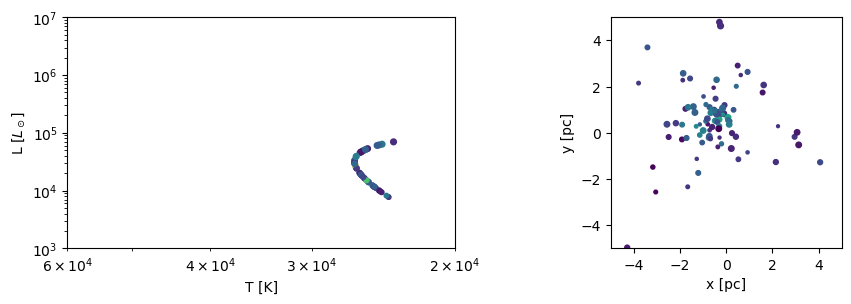

In [11]:
end_time = 1.0 | units.Myr
model_time = 0 | units.Myr
mtime = []
rvir = []
while(model_time<end_time):
    dt = stellar.particles.time_step.min() #We have a variable timestep chosen by the code, based on how the stars evolve
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    mtime.append(stellar.model_time.value_in(units.Myr))
    rvir.append(stars_o.virial_radius().value_in(units.pc))
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars_o.mass.sum().in_(units.MSun), 
          "rvir=", stars_o.virial_radius().in_(units.pc))
    
plot_snapshot_o(stars_o)
stellar.stop()
gravity.stop()

You have performed a small experiment in which a population of stars was evolved from zero-age to an age of 10 Myr.
The stars were selected randomly from a Salpeter mass function, and distributed in a virialized Plummer sphere with a characteristic (Plummer) radius of 1 pc.

Assignments and questions:
---------------

### Question 1:
You have plotted the Hertzsprung-Russel diagram and the x-y projection of the cluster before and after the simulation. Describe the differences.

### Assignment 1:
Rerun the calculation, but store the time and the virial radius in arrays. Make a plot of the virial radius as a function of time.

### Question 2:
Why is the cluster expanding?

### Question 3:
Why does it take a while before the cluster starts expanding?

### Question 4:
The virial radius does not expand monotonously. Why is that?

### Assignment 2:
Rerun the calculation without stellar evolution and quantify the difference in which the cluster expands with and without taking stellar evolution into account. 
When rerunning, make sure that you are using the same initial random seed for generating the initial mass function as well as for assigning the stellar positions and velocities.

Can you explain explain the difference between the simulation with- and the one without stellar evolution?

### Question 5:
In a previous assignment you have been checking binary formation.
What will happen here if you would continue the run until the first binary forms?

### Assignment 6:
Add diagnostic checking for energy conservation to the code.
Make sure to check the energy conservation for stellar evolution and stellar dynamics separately.

### Question 6:
Make a plot of the total, the potential and the kinetic energy of the N-body system as a function of time.

To what degree is the total energy conserved?
Is the amount of energy conservation sufficient to warrant a scientifically valid result, and if so, why is this the case?

### Assignment 7:
Replace the event-driven approach from the script and replace is with a simple time stepping in which you step-over from one code to the other every million years.

Now check the evolution of the virial radius and the energy conservation of the code again, and discuss the difference with the original event-driven approach.

In [12]:
#Q1: They are extremely different. In the initial HR diagram, we see something that looks like the main sequence, but 
#with a much higher initial mass. In the final HR diagram, we have an immediate turn-off into what looks like the 
#equivalent of the Red Giant Branch, and the points are much more concentrated. Similarly, the initial x-y projection
#is clustered near the center, and the final distribution is much more spread out.

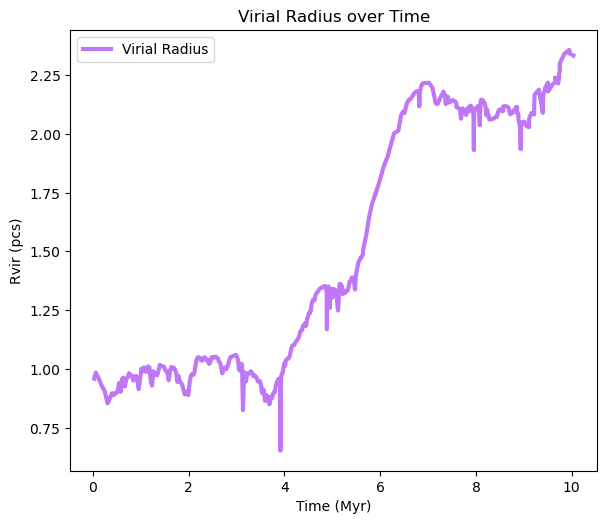

In [13]:
#A1: 
fig,ax = pyplot.subplots(1,1)
fig.set_size_inches(6,5)
fig.tight_layout()

#ax.set_xlim(0.0,1.5)
#ax[0].semilogx()

ax.set_title('Virial Radius over Time')
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Rvir (pcs)')

ax.plot(mtime, rvir, lw=3, color='xkcd:light purple', label="Virial Radius")
ax.legend(loc=0);

In [14]:
#Q2: The cluster is expanding because the energy from stellar interaction is greater than 1/2 of the gravitational energy 
#binding the cluster together. The cluster is no longer virialized.

#Q3: It takes some time because initially, the cluster is virialized. As the stars interact with each other, they begin to 
#build up kinetic energy to push away from each other. For some time these fluctuations in energy can be contained, but 
#eventually the kinetic energy of the cloud is larger than 1/2 its potential energy.

#Q4: This is because the gravitational energy is still fighting with the kinetic energy to pull the stars closer together.
#Unfortunately for the grav energy, when this happens, the density increases, which means the stars have greater kinetic
#energy, which eventually runs away.

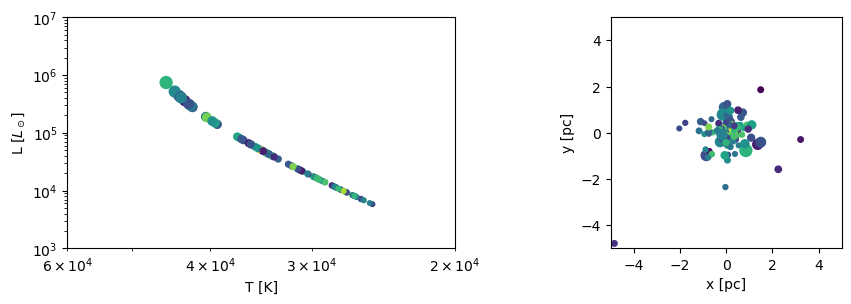

In [15]:
#A2:
stellarc = SeBa()
stellarc.particles.add_particles(stars_c)

gravityc = ph4(converter)
gravityc.particles.add_particles(stars_c)
ch_s2gc = stellarc.particles.new_channel_to(gravityc.particles)
ch_g2lc = gravityc.particles.new_channel_to(stars_c)
ch_s2lc = stellarc.particles.new_channel_to(stars_c)
ch_s2lc.copy()
gravity_etot_init = gravityc.kinetic_energy.value_in(units.J) + gravityc.potential_energy.value_in(units.J)
#stellar_etot_init = stellarc.kinetic_energy + stellarc.potential_energy

plot_snapshot_c(stars_c)

Grav Total Energy 8.196630598324597e-08
Evolved to t= 0.0315224286819 Myr mass= 2027.73170721 MSun rvir= 0.959153695194 parsec
Grav Total Energy 1.616337956821081e-07
Evolved to t= 0.0633681643247 Myr mass= 2027.73170721 MSun rvir= 0.984713321405 parsec
Grav Total Energy 2.2653343440608278e-07
Evolved to t= 0.0950522464871 Myr mass= 2027.73170721 MSun rvir= 0.971439819605 parsec
Grav Total Energy 2.7856645026967785e-07
Evolved to t= 0.126089714728 Myr mass= 2027.73170721 MSun rvir= 0.957567756768 parsec
Grav Total Energy 3.090260624379548e-07
Evolved to t= 0.15777379689 Myr mass= 2027.73170721 MSun rvir= 0.941820510279 parsec
Grav Total Energy 3.7708996554774347e-07
Evolved to t= 0.189134572092 Myr mass= 2027.73170721 MSun rvir= 0.927798736913 parsec
Grav Total Energy 3.8209711758472107e-07
Evolved to t= 0.220495347293 Myr mass= 2027.73170721 MSun rvir= 0.915674269186 parsec
Grav Total Energy 4.14865480071753e-07
Evolved to t= 0.252179429456 Myr mass= 2027.73170721 MSun rvir= 0.9051789

Evolved to t= 2.17326939077 Myr mass= 2027.73170721 MSun rvir= 0.933799596058 parsec
Grav Total Energy 9.17922739774306e-06
Evolved to t= 2.20479181945 Myr mass= 2027.73170721 MSun rvir= 0.908766977504 parsec
Grav Total Energy 9.485972164346335e-06
Evolved to t= 2.23631424813 Myr mass= 2027.73170721 MSun rvir= 0.918257700439 parsec
Grav Total Energy 9.844379026528607e-06
Evolved to t= 2.26783667682 Myr mass= 2027.73170721 MSun rvir= 0.920480883509 parsec
Grav Total Energy 9.882429196332438e-06
Evolved to t= 2.2993591055 Myr mass= 2027.73170721 MSun rvir= 0.94884543592 parsec
Grav Total Energy 1.0140954625255584e-05
Evolved to t= 2.33080070744 Myr mass= 2027.73170721 MSun rvir= 0.919453276631 parsec
Grav Total Energy 1.009489127461047e-05
Evolved to t= 2.36240396286 Myr mass= 2027.73170721 MSun rvir= 0.960722990329 parsec
Grav Total Energy 1.0241652236441035e-05
Evolved to t= 2.39376473806 Myr mass= 2027.73170721 MSun rvir= 0.964729276005 parsec
Grav Total Energy 1.0305678042959536e-05


Grav Total Energy 6.026917830868703e-05
Evolved to t= 4.37806121022 Myr mass= 2027.73170721 MSun rvir= 1.19034026464 parsec
Grav Total Energy 6.141013740230593e-05
Evolved to t= 4.4095836389 Myr mass= 2027.73170721 MSun rvir= 1.1760749925 parsec
Grav Total Energy 6.277970228812604e-05
Evolved to t= 4.44102524084 Myr mass= 2027.73170721 MSun rvir= 1.11027265727 parsec
Grav Total Energy 6.437947964762117e-05
Evolved to t= 4.47250725616 Myr mass= 2027.73170721 MSun rvir= 0.934697831829 parsec
Grav Total Energy 6.506662383580653e-05
Evolved to t= 4.50407009821 Myr mass= 2027.73170721 MSun rvir= 1.13628864006 parsec
Grav Total Energy 6.616155222425251e-05
Evolved to t= 4.53551170015 Myr mass= 2027.73170721 MSun rvir= 1.177146971 parsec
Grav Total Energy 6.746973052606251e-05
Evolved to t= 4.56703412883 Myr mass= 2027.73170721 MSun rvir= 1.18496254758 parsec
Grav Total Energy 6.857855775002949e-05
Evolved to t= 4.59855655751 Myr mass= 2027.73170721 MSun rvir= 1.18101106536 parsec
Grav Total 

Evolved to t= 6.55128008428 Myr mass= 2027.73170721 MSun rvir= 0.652710656803 parsec
Grav Total Energy 0.0003287179551498144
Evolved to t= 6.58279240962 Myr mass= 2027.73170721 MSun rvir= 0.883354498305 parsec
Grav Total Energy 0.0003358015349733722
Evolved to t= 6.61429463161 Myr mass= 2027.73170721 MSun rvir= 0.988846135262 parsec
Grav Total Energy 0.00034273628058850285
Evolved to t= 6.6458170603 Myr mass= 2027.73170721 MSun rvir= 1.01169998162 parsec
Grav Total Energy 0.0003495935966350608
Evolved to t= 6.67742031572 Myr mass= 2027.73170721 MSun rvir= 1.03608889496 parsec
Grav Total Energy 0.000356825954093644
Evolved to t= 6.70878109092 Myr mass= 2027.73170721 MSun rvir= 1.03840829158 parsec
Grav Total Energy 0.00036413543524704486
Evolved to t= 6.7403035196 Myr mass= 2027.73170721 MSun rvir= 1.00754869397 parsec
Grav Total Energy 0.0003710768072024377
Evolved to t= 6.77182594828 Myr mass= 2027.73170721 MSun rvir= 0.994496181963 parsec
Grav Total Energy 0.00037819277146571766
Evol

Grav Total Energy 0.0008935017433694086
Evolved to t= 8.85052805301 Myr mass= 2027.73170721 MSun rvir= 1.00760030909 parsec
Grav Total Energy 0.0009025349813489158
Evolved to t= 8.88205048169 Myr mass= 2027.73170721 MSun rvir= 0.947476039798 parsec
Grav Total Energy 0.0009122828543876369
Evolved to t= 8.91352239366 Myr mass= 2027.73170721 MSun rvir= 0.688733745119 parsec
Grav Total Energy 0.0009196808040854453
Evolved to t= 8.94501451231 Myr mass= 2027.73170721 MSun rvir= 0.854782923005 parsec
Grav Total Energy 0.0009285006145774994
Evolved to t= 8.97653694099 Myr mass= 2027.73170721 MSun rvir= 0.973168250493 parsec
Grav Total Energy 0.000937336877471653
Evolved to t= 9.00805936968 Myr mass= 2027.73170721 MSun rvir= 0.985935682613 parsec
Grav Total Energy 0.0009460069307197386
Evolved to t= 9.0396626251 Myr mass= 2027.73170721 MSun rvir= 0.960293605846 parsec
Grav Total Energy 0.0009547366303165065
Evolved to t= 9.0710234003 Myr mass= 2027.73170721 MSun rvir= 0.957176935991 parsec
Grav

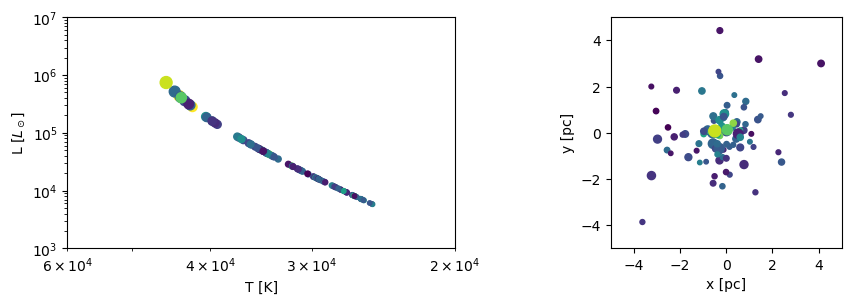

In [16]:
end_time = 10.0 | units.Myr
model_time = 0 | units.Myr
mtime_c = []
rvir_c = []
epot_c = []
ekin_c = []
etot_c = []
while(model_time<end_time):
    dt = stellarc.particles.time_step.min() #We have a variable timestep chosen by the code, based on how the stars evolve
    model_time += dt
    #stellarc.evolve_model(model_time)
    #ch_s2gc.copy()
    #ch_s2lc.copy()
    gravityc.evolve_model(model_time)
    gravity_etot = gravityc.kinetic_energy.value_in(units.J) + gravityc.potential_energy.value_in(units.J)
    epot_c.append(gravityc.potential_energy.value_in(units.J))
    ekin_c.append(gravityc.kinetic_energy.value_in(units.J))
    etot_c.append(gravity_etot)
    #stellar_etot = stellarc.kinteic_energy + stellarc.potential_energy
    print("Grav Total Energy {}".format((gravity_etot - gravity_etot_init)/gravity_etot))
    #print("STELLAR TOTAL ENERGY {}".format((stellar_etot - stellar_etot_init)/stellar_etot))
    ch_g2lc.copy()
    mtime_c.append(gravityc.model_time.value_in(units.Myr))
    rvir_c.append(stars_c.virial_radius().value_in(units.pc))
    print("Evolved to t=", #stellarc.model_time.in_(units.Myr), 
          gravityc.model_time.in_(units.Myr),
         "mass=", stars_c.mass.sum().in_(units.MSun), 
          "rvir=", stars_c.virial_radius().in_(units.pc))
    
plot_snapshot_c(stars_c)
#stellarc.stop()
gravityc.stop()

In [20]:
#Q5: The run would end very quickly, because the binaries are most likely to form when the cluster is at its most dense, 
#owing to the need for a third body to remove excess energy.

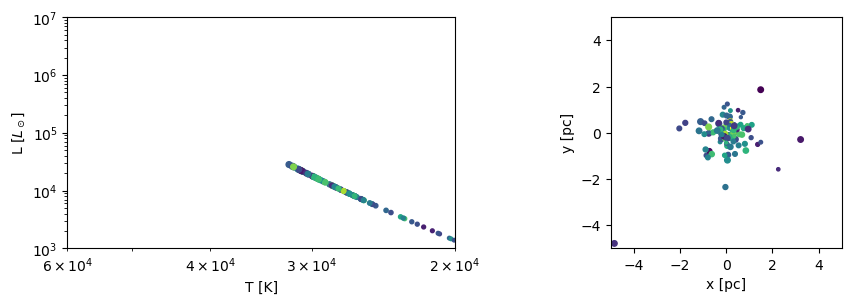

In [21]:
#A3:
stellars = SeBa()
stellars.particles.add_particles(stars_s)

#gravityc = ph4(converter)
#gravityc.particles.add_particles(stars_c)
#ch_s2gs = stellars.particles.new_channel_to(gravityc.particles)
#ch_g2ls = gravitys.particles.new_channel_to(stars_s)
ch_s2ls = stellars.particles.new_channel_to(stars_s)
ch_s2ls.copy()
#gravity_etot_init = gravityc.kinetic_energy + gravityc.potential_energy
#stellar_kinetic_energy = 3/2 * kB * stars_s.temperature.sum().in_(units.K)
#stellar_potential_energy = -3/5 * G * (stars_s.mass.sum().in_(units.MSun))**2 / (stars_c.virial_radius().in_(units.pc)))
stellar_etot_init = stars_s.kinetic_energy().value_in(units.J) + stars_s.potential_energy().value_in(units.J)

plot_snapshot_s(stars_s)

Total energy for stellar evolution is -0.0017096619328039997
Evolved to t= 1.035574496 Myr mass= 1112.6451341 MSun rvir= 1.01743171569 parsec


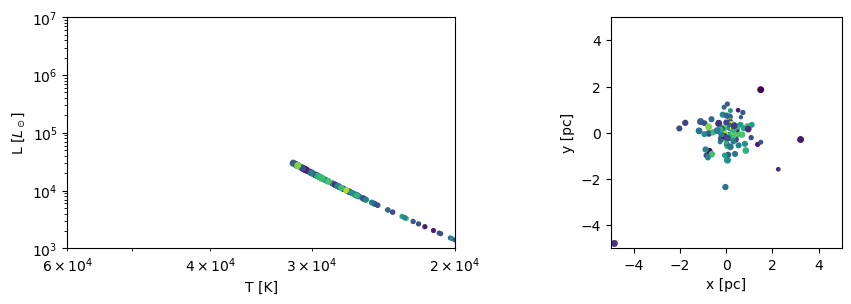

In [22]:
end_time = 1.0 | units.Myr
model_time = 0 | units.Myr
mtime_s = []
rvir_s = []
epot_s = []
ekin_s = []
etot_s = []
while(model_time<end_time):
    dt = stellars.particles.time_step.min() #We have a variable timestep chosen by the code, based on how the stars evolve
    model_time += dt
    stellars.evolve_model(model_time)
    #ch_s2gc.copy()
    ch_s2ls.copy()
    #gravityc.evolve_model(model_time)
    stellar_etot = stars_s.kinetic_energy().value_in(units.J) + stars_s.potential_energy().value_in(units.J)
    epot_s.append(stars_s.potential_energy().value_in(units.J))
    ekin_s.append(stars_s.kinetic_energy().value_in(units.J))
    etot_s.append(stellar_etot)
    #print("Total energy for gravitational evolution is {}".format((gravity_etot - gravity_etot_init)/gravity_etot))
    print("Total energy for stellar evolution is {}".format((stellar_etot - stellar_etot_init)/stellar_etot))
    #ch_g2lc.copy()
    mtime_s.append(stellars.model_time.value_in(units.Myr))
    rvir_s.append(stars_s.virial_radius().value_in(units.pc))
    print("Evolved to t=", stellars.model_time.in_(units.Myr), 
          #gravitys.model_time.in_(units.Myr),
         "mass=", stars_s.mass.sum().in_(units.MSun), 
          "rvir=", stars_s.virial_radius().in_(units.pc))
    
plot_snapshot_s(stars_s)
stellars.stop()
#gravityc.stop()

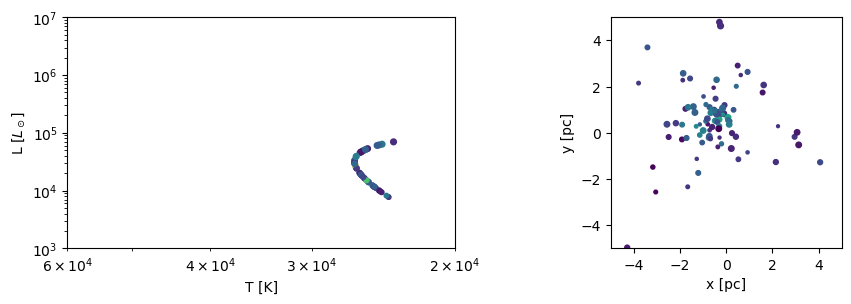

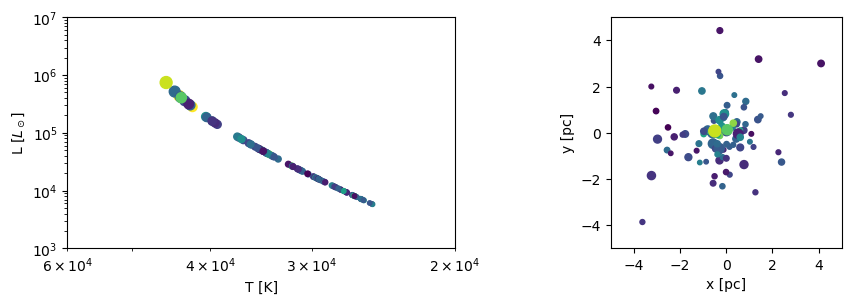

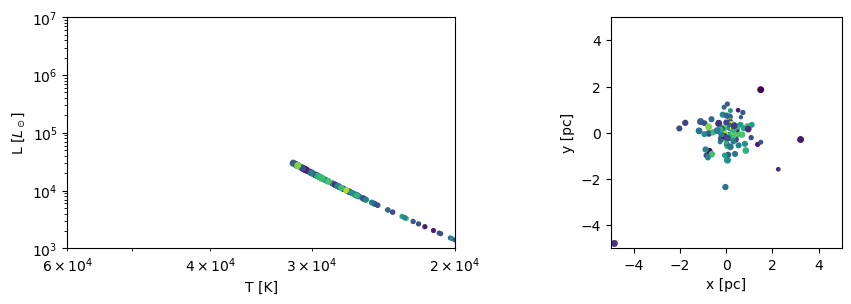

In [23]:
plot_snapshot_o(stars_o)
plot_snapshot_c(stars_c)
plot_snapshot_s(stars_s)

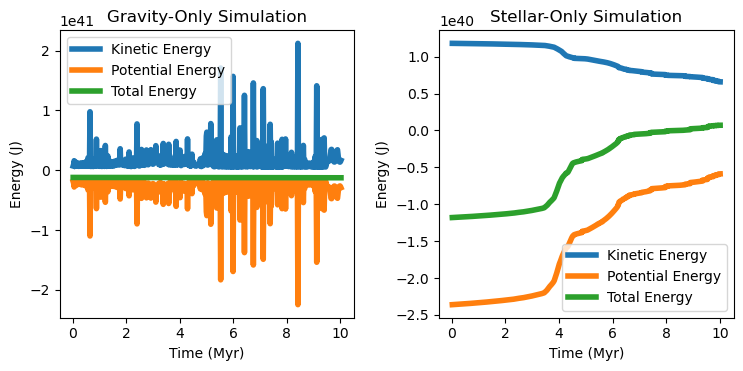

In [24]:
fig,ax = pyplot.subplots(1,2)
fig.set_size_inches(8,4)
fig.tight_layout(pad=3.0)

#ax.set_xlim(0.0,1.5)
#ax[0].semilogx()

ax[0].set_title('Gravity-Only Simulation')
ax[0].set_ylabel('Energy (J)')
ax[0].set_xlabel('Time (Myr)')

ax[1].set_title('Stellar-Only Simulation')
ax[1].set_ylabel('Energy (J)')
ax[1].set_xlabel('Time (Myr)')

ax[0].plot(mtime_c, ekin_c, lw=4, ls="-", label="Kinetic Energy")
ax[0].plot(mtime_c, epot_c, lw=4, ls="-", label="Potential Energy")
ax[0].plot(mtime_c, etot_c, lw=4, ls="-", label="Total Energy")
ax[0].legend(loc=0)

ax[1].plot(mtime_s, ekin_s, lw=4, ls="-", label="Kinetic Energy")
ax[1].plot(mtime_s, epot_s, lw=4, ls="-", label="Potential Energy")
ax[1].plot(mtime_s, etot_s, lw=4, ls="-", label="Total Energy")
ax[1].legend(loc=0);

In [25]:
#Q6: The change in total energy for the gravitational simulation is zero, so energy is conserved. For the stellar simulation,
#the change in energy seems to be of 1 order of magnitude, from 10**40 J to 10**39, which implies that as the
#stars are evolving, there is a net loss of energy, which can be accounted for by considering systemic mass loss from 
#fusion. When we are talking about ~40 orders of magnitude, a change of 1 order of magnitude seems to indicate that the 
#result is still scientifically valid.

In [26]:
#A7: Basically create a fixed time step of 1 million years, since with the channels the code is already stepping from one
#to the other

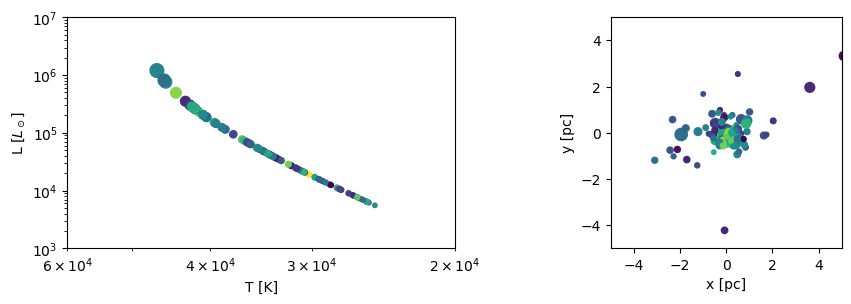

In [5]:
stellarfin = SeBa()
stellarfin.particles.add_particles(stars_fin)

gravityfin = ph4(converter)
gravityfin.particles.add_particles(stars_fin)
ch_s2gfin = stellarfin.particles.new_channel_to(gravityfin.particles)
ch_g2lfin = gravityfin.particles.new_channel_to(stars_fin)
ch_s2lfin = stellarfin.particles.new_channel_to(stars_fin)
ch_s2lfin.copy()
gravity_etot_init = gravityfin.kinetic_energy.value_in(units.J) + gravityfin.potential_energy.value_in(units.J)
stellar_etot_init = stars_s.kinetic_energy().value_in(units.J) + stars_s.potential_energy().value_in(units.J)

plot_snapshot_fin(stars_fin)

Change in energy for gravitational evolution is -0.016460590019691943
Change in energy for stellar evolution is -0.016461731907082347
Evolved to t= 1.0 Myr 1.00028111652 Myr mass= 2258.7661194 MSun rvir= 1.0123328958 parsec
Change in energy for gravitational evolution is -0.042837117991932926
Change in energy for stellar evolution is -0.04284464767612467
Evolved to t= 2.0 Myr 2.00002756843 Myr mass= 2242.93727298 MSun rvir= 0.834686569432 parsec
Change in energy for gravitational evolution is -0.12878376862371618
Change in energy for stellar evolution is -0.12919005522470553
Evolved to t= 3.0 Myr 3.00007954298 Myr mass= 2217.32209725 MSun rvir= 1.06398648754 parsec
Change in energy for gravitational evolution is -0.7349205288681511
Change in energy for stellar evolution is -0.7349245318317048
Evolved to t= 4.0 Myr 4.00020789818 Myr mass= 2038.50587008 MSun rvir= 1.28108889246 parsec
Change in energy for gravitational evolution is -1.9287630579588029
Change in energy for stellar evoluti

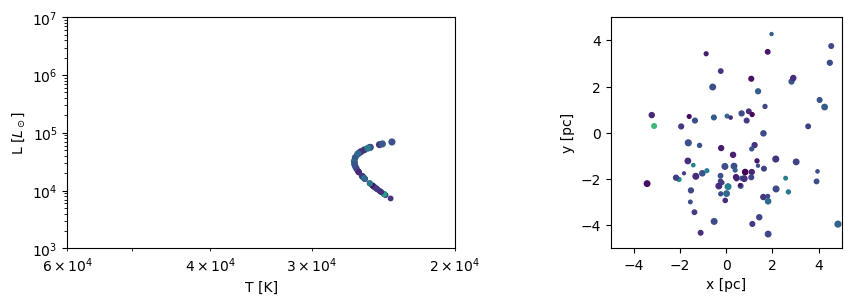

In [7]:
end_time = 10.0 | units.Myr
model_time = 0 | units.Myr
mtime_fin = []
rvir_fin = []
epot_fin = []
ekin_fin = []
etot_fin = []
while(model_time<end_time):
    #dt = stellars.particles.time_step.min() #We have a variable timestep chosen by the code, based on how the stars evolve
    dt = 1 | units.Myr
    model_time += dt
    stellarfin.evolve_model(model_time)
    ch_s2gfin.copy()
    ch_s2lfin.copy()
    gravityfin.evolve_model(model_time)
    gravity_etot = gravityfin.kinetic_energy.value_in(units.J) + gravityfin.potential_energy.value_in(units.J)
    stellar_etot = stars_fin.kinetic_energy().value_in(units.J) + stars_fin.potential_energy().value_in(units.J)
    epot_fin.append(stars_fin.potential_energy().value_in(units.J))
    ekin_fin.append(stars_fin.kinetic_energy().value_in(units.J))
    etot_fin.append(stellar_etot)
    print("Change in energy for gravitational evolution is {}".format((gravity_etot - gravity_etot_init)/gravity_etot))
    print("Change in energy for stellar evolution is {}".format((stellar_etot - stellar_etot_init)/stellar_etot))
    ch_g2lfin.copy()
    mtime_fin.append(stellarfin.model_time.value_in(units.Myr))
    rvir_fin.append(stars_fin.virial_radius().value_in(units.pc))
    print("Evolved to t=", stellarfin.model_time.in_(units.Myr), 
          gravityfin.model_time.in_(units.Myr),
         "mass=", stars_fin.mass.sum().in_(units.MSun), 
          "rvir=", stars_fin.virial_radius().in_(units.pc))
    
plot_snapshot_fin(stars_fin)
stellarfin.stop()
gravityfin.stop()

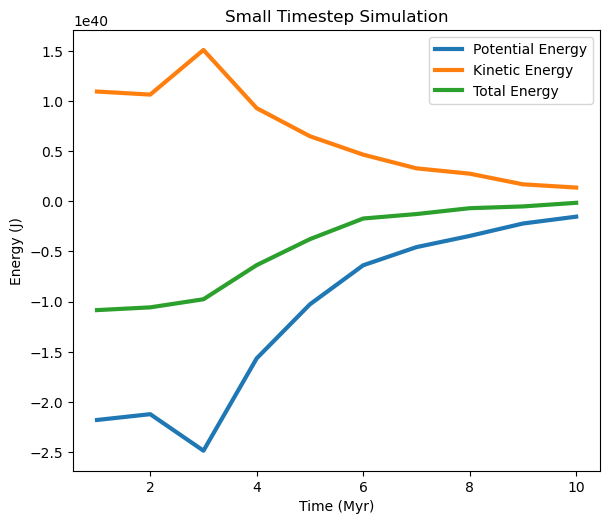

In [8]:
fig,ax = pyplot.subplots(1,1)
fig.set_size_inches(6,5)
fig.tight_layout()

#ax.set_xlim(0.0,1.5)
#ax[0].semilogx()

ax.set_title('Small Timestep Simulation')
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Energy (J)')

ax.plot(mtime_fin, epot_fin, lw=3, label="Potential Energy")
ax.plot(mtime_fin, ekin_fin, lw=3, label="Kinetic Energy")
ax.plot(mtime_fin, etot_fin, lw=3, label="Total Energy")
ax.legend(loc=0);

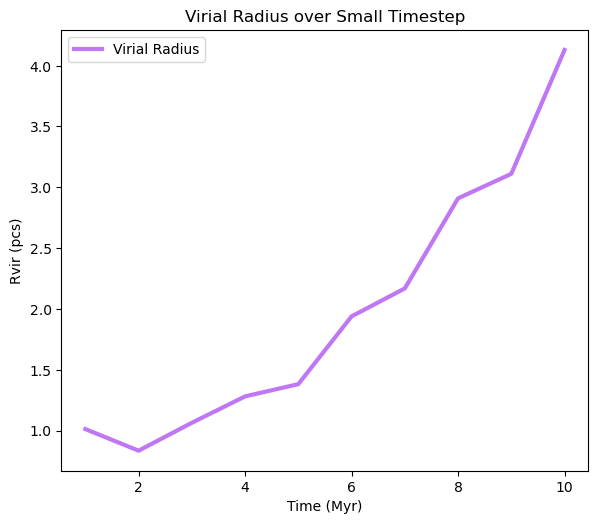

In [9]:
fig,ax = pyplot.subplots(1,1)
fig.set_size_inches(6,5)
fig.tight_layout()

#ax.set_xlim(0.0,1.5)
#ax[0].semilogx()

ax.set_title('Virial Radius over Small Timestep')
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Rvir (pcs)')

ax.plot(mtime_fin, rvir_fin, lw=3, color='xkcd:light purple', label="Virial Radius")
ax.legend(loc=0);

In [ ]:
#A7: In essence it is the same as the event-driven approach, except that we have much less detail, which makes sense.